<div style="background-color:	#216375 ; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:black"> Generative AI: Portfolio 1, Diffusion Model from scratch</h1>
<b style="color:white"> Julia Boschman, Daan Eising</b>
    </div>

<a name='start'></a>

## Table of contents

1. [H1: Inleiding](#1.0)
    - [&sect;1.1: Imports](#1.1)
2. [H2: Dataset](#2.0)
    - [&sect;2.1: Let op!](#2.1)
    - [&sect;2.2: Aanmaken nieuwe map](#2.2)
    - [&sect;2.3: Inlezen afbeeldingen bestaande map](#2.3)
    - [&sect;2.4: Weergave selectie dataset](#2.4)
3. [H3: Diffusion Model from scratch](#3.0)
    - [&sect;3.1: Aanmaken parameters Diffusion Model](#3.1)
    - [&sect;3.2: Dataset klaarmaken voor training](#3.2)
    - [&sect;3.3: Het model aanroepen](#3.3)
    - [&sect;3.4: Het model trainen](#3.4)
    - [&sect;3.5: Evalueren van de loss](#3.5)
4. [H4: Vergelijken werkelijke data met gegenereerde data](#4.0)
5. [H5: Korte reflectie op resultaten](#5.0)
6. [H6: Literatuurlijst](#6.0)

[Back to the top](#start)
<a name='1.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H1: Inleiding</strong></h2>
</div>

Voor het eerste portfolio van Generative AI is het de bedoeling om een model uit te kiezen en deze "from scratch" na te bouwen. Dit hebben wij gedaan op basis van de paper, Denoising Diffusion Probablistic Model, over Diffusion models. (Ho et al., 2020b) We kozen voor dit model omdat wij ons als duo eerder al in een andere paper over diffusion-modellen hebben verdiept. Door voor dit portfolio dit model te kiezen, kunnen we nu zelf proberen een diffusie model te implementeren.
Het paper legt in detail uit wat de werking en de wiskunde is achter het model en deelt de resultaten van hun invulling van de Denoising Diffusion Probabilistic Models. In dit notebook laten wij zien hoe het main.py bestandje gebruikt kan worden om een Diffusion model te trainen. Verdere code van het model zelf is dan dus ook te vinden in het main.py bestand.

Om een wat beter begrip te krijgen van het bouwen van modellen "from scratch" hebben we gekeken wat er online te vinden was en vonden een interessant artikel genaamd *Generative AI: What, why, how, when | UpTech*. (_Generative AI: What, Why, How, When | UpTech_, 2024). Voordat wij zijn begonnen aan het werkelijke coderen hebben wij ons hier eerst ingelezen om te begrijpen wat het proces is van het bouwen van een eigen generatief model. Daarnaast vonden we het ook belangrijk om eerst een goed beeld te krijgen van een Diffusion Model en hebben hier daarom ook een filmpje over gekeken, zodat wij wisten wat het uiteindelijke resultaat op zou moeten leveren. (AssemblyAI, 2022)

Voor de verbetering van de code hebben wij samen met ChatGPT gekeken naar de mogelijke aanpassingen. Dit hebben wij deels in de chat "Verbetering Diffusionmodel Prestaties" gedaan en in een chat die niet gedeeld kan worden wegens de aanwezigheid van afbeeldingen.(_ChatGPT - Verbetering Diffusionmodel Prestaties_, 2025) Deze chat kunnen wij tijdens het assessment wel laten zien.

<a name='1.1'></a>
<h3>&sect;1.1: Imports</h3>

Om er voor te zorgen dat alle modules gedownload kunnen worden doen we eerst een pip install voor alle modules die niet geïnstalleerd zijn.

In [ ]:
#!pip install tensorflow
#!pip install tqdm

Nu alle ontbrekende modules zijn geïnstalleerd, kunnen we de benodigde modules importeren. Aangezien een deel hiervan al wordt aangeroepen in main.py, is het niet nodig om alles opnieuw in het notebook te importeren. Omdat we dit notebook draaien in Google Colab, hebben we wel extra imports toegevoegd die specifiek daarvoor nodig zijn. Voor de volledigheid en leesbaarheid hebben we hieronder alsnog alle gebruikte modules opgenomen.

In [ ]:
import os
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tqdm import tqdm

# Imports voor werking google drive

from google.colab import drive
import shutil

drive.mount('/content/drive')

# Import nodig voor het importeren van main.py uit drive
import sys
sys.path.append('/content/drive/MyDrive/portfolio_genai_1')

from main import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[Back to the top](#start)
<a name='2.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H2: Dataset</strong></h2>
</div>

Een Diffusion model kan zowel gebruikt worden voor het genereren van tekst als het genereren van afbeeldingen. De paper over Diffusion Models die wij hebben gelezen gebruikt de toepassing van het genereren van afbeeldingen. Om die reden hebben wij er voor gekozen om in dit notebook ook gebruik te maken van afbeeldingen.


De afbeeldingen die wij hebben gekozen om te genereren is de Barok dataset van Kaggle's WikiArt. (WikiArt, 2022) In de dataset staan afbeeldingen van een hoop verschillende soorten kunst. Denk hier bijvoorbeeld aan abstract expressionisme, modern realisme, impressionisme, pop art en nog een hoop andere soorten kunst. De reden dat wij hebben gekozen voor de Barok dataset is, omdat het ons gaaf leek om nieuwe kunst te genereren van een stijl die nog niet vaak wordt gebruikt in de generatieve AI. Hierdoor zagen wij het als een leuke uitdaging en zal het leuk zijn om een resultaat te zien van een nieuw kunstwerk met een stijl uit de zeventiende en achttiende eeuw.


Om dit notebook zelf te kunnen runnen is het belangrijk om eerst de boven genoemde dataset te downloaden van Kaggle. Dit is gemakkelijk en gratis te doen met een Kaggle account. Hierdoor is het ook mogelijk voor andere mensen om gebruik te maken van onze toepassing.

<a name='2.1'></a>
<h3>&sect;2.1: Let op</h3>

### Let op: Hieronder staan twee codecellen: 2.2 en 2.3.

Codecel 2.2 bevat code om de originele afbeeldingen te resizen naar het gewenste formaat. Dit proces duurt gemiddeld 8 minuten. Zodra dit eenmaal is gedaan, hoeft deze stap niet opnieuw uitgevoerd te worden. Daarom is assert False toegevoegd: dit voorkomt dat de cel per ongeluk wordt uitgevoerd bij “Run all”.
Wil je toch opnieuw resizen, dan kun je de assert handmatig verwijderen.
Codecel 2.3 bevat de code om eerder geresize-de afbeeldingen in te laden vanuit de juiste bestandslocatie.

<a name='2.2'></a>
<h3>&sect;2.2: Aanmaken nieuwe map</h3>

Voor het aanmaken van de functie hebben wij gekeken naar de documentatie van het preprocessen van images. (Patel, 2023) Wij hebben dit in de opleiding vaker moeten doen, maar dit is kennis die bij ons beide wat was weg gezakt.

In [ ]:
IMAGE_DIR = "/content/drive/MyDrive/portfolio_genai_1/Baroque"
SAVE_DIR = "/content/drive/MyDrive/portfolio_genai_1/Processed_Baroque_32"

In [ ]:
# Deze code cell niet runnen!
assert False # Zorgt ervoor dat de code cell faalt zodat er niet onnodig opnieuw wordt geresized.

# Grootte van de afbeeldingen
IMG_SIZE = (32, 32)
os.makedirs(SAVE_DIR, exist_ok=True)

dataset_32 = preprocess_and_save_images(IMAGE_DIR, SAVE_DIR, IMG_SIZE)
print(f"Dataset geladen met vorm: {dataset_32.shape}")

AssertionError: 

<a name='2.3'></a>
<h3>&sect;2.3: Inlezen afbeeldingen bestaande map</h3>

Voor het inlezen van de afbeeldingen uit een bestaande map.

In [ ]:
dataset_32 = load_images_from_folder(SAVE_DIR)

4240 afbeeldingen geladen uit /content/drive/MyDrive/portfolio_genai_1/Processed_Baroque_32!


<a name='2.4'></a>
<h3>&sect;2.4: Weergave selectie dataset</h3>


Hieronder voeren wij de functie show_images uit op de geresize-de dataset en geven aan dat we er 9 willen zien. Door een aantal willekeurige afbeeldingen uit de dataset te tonen, krijgen we een eerste indruk van de data. Zo kunnen we ook controleren of de data het gewenste formaat heeft en om welke stijl afbeeldingen het gaat.


Aller eerst hadden wij de afbeeldingen ingeladen met een grootte van 128 bij 128. Deze afbeeldingen waren een stuk duidelijker en gedetailleerder, maar wij leerde al snel dat dit negatieve effecten had op de prestaties van ons model. Daarom hebben wij er uiteindelijk voor gekozen om afbeeldingen te gebruiken met een kleinere grootte, zodat het model een grotere kans heeft op slagen.

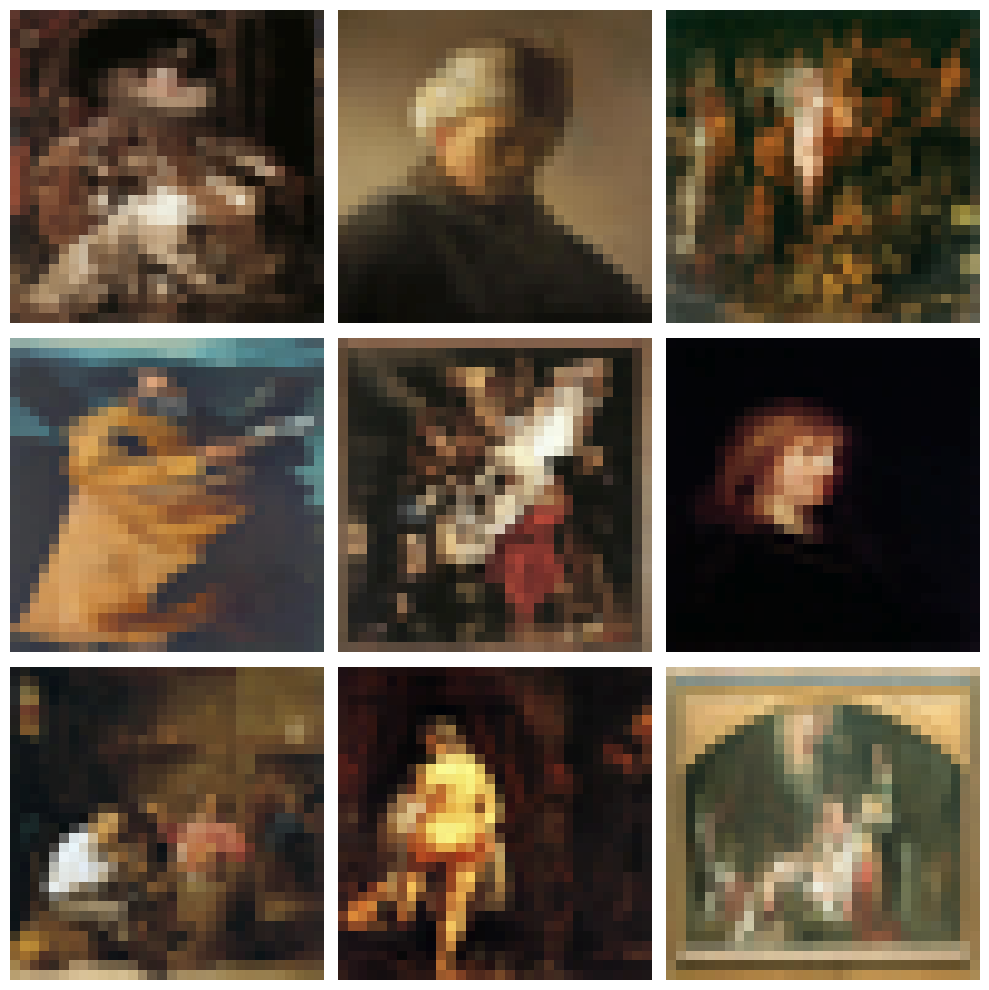

In [ ]:
show_images(dataset_32, num_images=9)

[Back to the top](#start)
<a name='3.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H3: Diffusion Model from scratch</strong></h2>
</div>

In dit hoofdstuk gebruiken we de functies uit main.py om ons Diffusion Model from scratch op te zetten, voor te bereiden en te trainen. Hiermee laten we zien hoe de losse onderdelen samenkomen tot ons generatief diffusion model voor Barok schilderijen data. (WikiArt, 2022)

Aangezien keras uit Tensorflow niet gebruikt mag worden, hebben wij veel gebruik gemaakt van de andere mogelijke opties van Tensorflow. Wij hebben de documentatie van Tensorflow dan ook veel geraadpleegd. (Tensorflow, 2024)


Wij hebben de Tensorflow documentatie bijvoorbeeld gebruikt bij het uitzoeken van de werking van tf.GradientTape; Tensorflow, tf.GradientTape (2024), of het bouwen van lagen in een model met tf.Variable; Tensorflow, tf.Variable(2024).

<a name='3.1'></a>
<h3>&sect;3.1: Aanmaken parameters Diffusion Model</h3>

De eerste stap is het instellen van de parameters voor het diffusieproces.

- De eerste parameter die we instellen is T, dit staat voor het aantal timesteps. T bepaalt in hoeveel stappen er geleidelijk ruis aan de afbeeldingen wordt toegevoegd tijdens het forward diffusion-proces.

- Vervolgens definiëren we beta. Beta geeft aan hoeveel ruis er per stap wordt toegevoegd. Hiervoor gebruiken we np.linspace(1e-4, 0.02, T), wat betekent dat we een reeks van T waarden genereren die gelijkmatig verdeeld zijn tussen 1e-4 en 0.02. Dit zorgt ervoor dat de hoeveelheid toegevoegde ruis langzaam toeneemt naarmate het proces vordert — met weinig ruis in het begin en steeds iets meer richting het einde.

- Hierna berekenen we alpha, dat wordt gedefinieerd als 1 - beta. Alpha representeert het deel van de originele afbeelding dat na elke stap behouden blijft (dus: hoe weinig ruis er is toegevoegd).

- Tot slot berekenen we alpha_bar, de cumulatieve productwaarde van alle voorgaande alpha-waarden. Alpha_bar geeft aan hoeveel van het oorspronkelijke signaal (de originele afbeelding) nog over is na een bepaald aantal timesteps. Naarmate t toeneemt, wordt deze waarde steeds kleiner dit betekent dat steeds meer ruis is en steeds minder overblijft van het originele beeld.


In [ ]:
# De onderstaande parameters worden ook aangemaakt in main.py,
# maar voor de leesbaarheid tonen wij deze parameters hieronder nogmaals.
T = 250
beta = np.linspace(1e-4, 0.02, T)
alpha = 1 - beta
alpha_bar = np.cumprod(alpha)

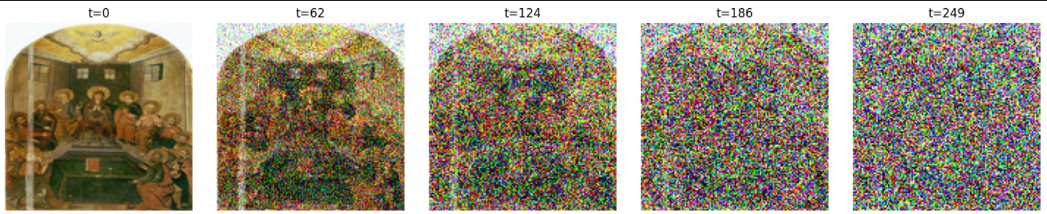

Om het effect van het diffusieproces beter te begrijpen, kijken wij naar de bovenstaande afbeelding. Hierin kunnen wij zien hoe een afbeelding verandert over verschillende timesteps.

In de afbeelding hierboven zie je een visualisatie van één afbeelding die door het forward diffusion process gaat. Bij t = 0 zien we de originele afbeelding. Naarmate t toeneemt (bijvoorbeeld t = 62, t = 124, t = 186, etc.), wordt er telkens meer ruis toegevoegd aan de afbeelding.

Bij de laatste stap, t = 249, is de afbeelding volledig veranderd in ruis en is er nauwelijks nog iets van het originele beeld te herkennen. Dit proces toont hoe het model leert om stapsgewijs ruis toe te voegen (forward).

Deze stappen worden aangestuurd door de parameter T, die we eerder instelden op 250. Elke stap voegt gecontroleerd een beetje ruis toe op basis van de beta-waarden. In de training leert het model precies hoeveel ruis er per stap is toegevoegd, zodat het later de omgekeerde richting kan uitvoeren en nieuwe afbeeldingen kan reconstrueren uit willekeurige ruis.

<a name='3.2'></a>
<h3>&sect;3.2: Dataset klaarmaken voor training</h3>



De tweede stap is het klaarmaken van de afbeeldingsdata voor training.

- Met de eerste regel data = dataset_32.reshape(-1, 32x32x3) flattenen we de afbeeldingen van een 3D-vorm naar een 1D-vector. Omdat elke afbeelding 32 pixels hoog, 32 pixels breed en 3 kleurkanalen (RGB) heeft, wordt elke afbeelding omgezet naar een vector van lengte 3072. De -1 zorgt ervoor dat NumPy automatisch het aantal afbeeldingen invult.

- Vervolgens normaliseren we de waarden in de dataset met data = (data / 127.5) - 1.0. Normaal bevatten RGB-afbeeldingen waarden tussen 0 en 255. Door eerst te delen door 127.5 en daarna 1.0 af te trekken, brengen we deze waarden terug naar het bereik [-1, 1]. Dit doen we omdat modellen tijdens training beter convergeren wanneer de inputwaarden rondom nul liggen.

In [ ]:
data = dataset_32.reshape(-1, 32*32*3)  # Flatten de afbeeldingen naar vectoren
data = (data / 127.5) - 1.0  # Normaliseer naar [-1,1]

<a name='3.3'></a>
<h3>&sect;3.3: Het model aanroepen</h3>

Nu in stap 3 maken we een nieuw Diffusion Model aan.

Hiervoor gebruiken we de functie DiffusionModel, waarbij we meerdere parameters kunnen instellen op basis van de dataset. Hieronder lichten we toe wat deze parameters betekenen:

  - input_dim=32x32x3: Dit is simpelweg de vorm van de afbeelding nadat deze is geflattened naar een 1D-vector.

  - t_embed_dim=16: Dit geeft aan hoeveel getallen we gebruiken om de tijdstap (t) om te zetten naar een vector die het model kan begrijpen. Hoe hoger deze waarde, hoe meer ruimte het model heeft om te leren van wanneer in het diffusieproces het zich bevindt. In dit geval gebruiken we 16 getallen om één tijdstap te representeren.

  -hidden_dims=[512, 1024, 512]: Dit bepaalt het aantal neuronen in de verborgen lagen van het neurale netwerk. In main.py is gekozen voor drie lagen, met respectievelijk 512, 1024 en 512 neuronen. Deze getallen bepalen hoe zwaar of licht het model is. Wij kunnen dit naar wens aanpassen om bijvoorbeeld sneller te trainen of betere resultaten te behalen.

  -output_dim=32x32x3: De outputdimensie is gelijk aan de input, omdat het model voorspelt hoeveel ruis er is toegevoegd aan elke pixel. We willen dus een outputvector van dezelfde grootte als de input.

In [ ]:
model = DiffusionModel(input_dim=32*32*3, t_embed_dim=16, hidden_dims=[512, 1024, 512], output_dim=32*32*3)

<a name='3.4'></a>
<h3>&sect;3.4: Het model trainen</h3>

Aangekomen bij stap 4 gaan we het Diffusion Model daadwerkelijk trainen. Dit doen we met behulp van de functie train_diffusion_model().

We geven hierbij de volgende parameters mee:

  - model: het Diffusion Model dat we eerder hebben aangemaakt.

  - data: de genormaliseerde en geflattenede afbeeldingendata, in ons geval schilderijen in Barokstijl.

  - epochs=2: het aantal keer dat het model de volledige dataset doorloopt. Normaal zou dit bijvoorbeeld op 200 staan, maar voor testdoeleinden gebruiken we tijdelijk 2.

  - batch_size=16: het aantal afbeeldingen dat tegelijk wordt verwerkt in één trainingsstap. Hoe hoger de batch size, hoe sneller de training verloopt, maar des te meer rekenkracht er nodig is.

In deze stap leert het model te voorspellen welke ruis is toegevoegd aan de inputdata. Dit is onderdeel van het forward process. Hoe beter het model hierin wordt, hoe beter het later het reverse process kan uitvoeren, waarmee het stap voor stap ruis kan verwijderen en uiteindelijk nieuwe afbeeldingen kan genereren.

Naast alle parameters maakt de train_diffusion_model() functie ook gebruik van de module tqdm, Da Costa-Luis (2022), wat simpel weg een progressie balk weergeeft. Op deze manier konden wij kijken hoe lang het per epoch duurde om te trainen. Door deze module kwamen wij er ook achter dat het wel 3 uur kon duren voordat één epoch gerund zou zijn. Dit help ons met het bepalen of wij nieuwe aanpassingen moesten doen, of wilde wachten op de output van het model.

In [ ]:
losses = train_diffusion_model(model, data, epochs=100, batch_size=16) # Voorheen 200 epochs, voor de test 2

Starting Epoch 1/100


Epoch 1/100: 100%|██████████| 265/265 [00:47<00:00,  5.63it/s]

Epoch 1/100 - Loss: 1.000107 - Time: 47.10s
Average gradients: [8.9550696e-07 9.5281985e-07 2.4806905e-06 4.5852321e-06 9.0864760e-06
 1.8806766e-05 3.7752434e-05 1.3069615e-04]
Starting Epoch 2/100



Epoch 2/100: 100%|██████████| 265/265 [00:47<00:00,  5.64it/s]

Epoch 2/100 - Loss: 1.000229 - Time: 47.03s
Average gradients: [1.9004943e-07 1.9515619e-07 6.0395115e-07 1.2280681e-06 4.3687996e-06
 9.6789472e-06 1.9439356e-05 1.3028312e-04]
Starting Epoch 3/100



Epoch 3/100: 100%|██████████| 265/265 [00:51<00:00,  5.16it/s]

Epoch 3/100 - Loss: 1.000088 - Time: 51.34s
Average gradients: [7.0423977e-07 8.4214577e-07 7.8608900e-07 1.6460091e-06 3.9835586e-06
 8.8345487e-06 1.5705682e-05 1.3022262e-04]
Starting Epoch 4/100



Epoch 4/100: 100%|██████████| 265/265 [00:46<00:00,  5.71it/s]

Epoch 4/100 - Loss: 0.999971 - Time: 46.43s
Average gradients: [2.5931977e-06 3.1862485e-06 1.9475567e-06 4.0840196e-06 4.4903404e-06
 9.4424340e-06 1.4700909e-05 1.3027558e-04]
Starting Epoch 5/100



Epoch 5/100: 100%|██████████| 265/265 [00:45<00:00,  5.81it/s]

Epoch 5/100 - Loss: 1.000520 - Time: 45.65s
Average gradients: [3.3827178e-06 4.2215479e-06 2.3778211e-06 4.9310133e-06 4.5075026e-06
 9.6226577e-06 1.3282308e-05 1.3020460e-04]
Starting Epoch 6/100



Epoch 6/100: 100%|██████████| 265/265 [00:45<00:00,  5.78it/s]

Epoch 6/100 - Loss: 0.999911 - Time: 45.88s
Average gradients: [4.8780803e-06 5.8654141e-06 3.1763109e-06 6.6338621e-06 4.7571516e-06
 9.9087492e-06 1.3619883e-05 1.3011397e-04]
Starting Epoch 7/100



Epoch 7/100: 100%|██████████| 265/265 [00:48<00:00,  5.49it/s]

Epoch 7/100 - Loss: 1.000072 - Time: 48.26s
Average gradients: [6.4994165e-06 7.8962103e-06 3.7066050e-06 7.5940798e-06 5.2098635e-06
 1.0674925e-05 1.4676438e-05 1.3027988e-04]
Starting Epoch 8/100



Epoch 8/100: 100%|██████████| 265/265 [00:47<00:00,  5.61it/s]

Epoch 8/100 - Loss: 0.998963 - Time: 47.24s
Average gradients: [8.8341640e-06 1.0750855e-05 4.8810316e-06 9.9506606e-06 6.0146849e-06
 1.2183649e-05 1.6730120e-05 1.3023135e-04]
Starting Epoch 9/100



Epoch 9/100: 100%|██████████| 265/265 [00:49<00:00,  5.34it/s]

Epoch 9/100 - Loss: 0.998468 - Time: 49.65s
Average gradients: [1.12157049e-05 1.35095925e-05 5.85829412e-06 1.19715041e-05
 6.61534523e-06 1.34747343e-05 1.75862551e-05 1.30485932e-04]
Starting Epoch 10/100



Epoch 10/100: 100%|██████████| 265/265 [00:49<00:00,  5.39it/s]

Epoch 10/100 - Loss: 0.999077 - Time: 49.13s
Average gradients: [1.2834768e-05 1.5540949e-05 6.2236059e-06 1.2763310e-05 6.8991753e-06
 1.4084592e-05 1.8271967e-05 1.3037487e-04]
Starting Epoch 11/100



Epoch 11/100: 100%|██████████| 265/265 [00:48<00:00,  5.51it/s]

Epoch 11/100 - Loss: 0.998125 - Time: 48.06s
Average gradients: [1.4028242e-05 1.6854894e-05 6.6300117e-06 1.3598597e-05 7.2996322e-06
 1.5085203e-05 1.8563405e-05 1.3060702e-04]
Starting Epoch 12/100



Epoch 12/100: 100%|██████████| 265/265 [00:47<00:00,  5.54it/s]

Epoch 12/100 - Loss: 0.997297 - Time: 47.88s
Average gradients: [1.51398735e-05 1.80796069e-05 7.14449016e-06 1.47179680e-05
 7.60238527e-06 1.57558079e-05 1.89463663e-05 1.30607150e-04]
Starting Epoch 13/100



Epoch 13/100: 100%|██████████| 265/265 [00:47<00:00,  5.55it/s]

Epoch 13/100 - Loss: 0.997248 - Time: 47.75s
Average gradients: [1.6476004e-05 1.9717718e-05 7.4516456e-06 1.5372190e-05 7.6083720e-06
 1.5825153e-05 1.9418836e-05 1.3048513e-04]
Starting Epoch 14/100



Epoch 14/100: 100%|██████████| 265/265 [00:49<00:00,  5.38it/s]

Epoch 14/100 - Loss: 0.996602 - Time: 49.22s
Average gradients: [1.6091904e-05 1.9509118e-05 7.1789909e-06 1.4706760e-05 7.5748217e-06
 1.5561598e-05 2.0041911e-05 1.3031212e-04]
Starting Epoch 15/100



Epoch 15/100: 100%|██████████| 265/265 [00:48<00:00,  5.42it/s]

Epoch 15/100 - Loss: 0.997115 - Time: 48.88s
Average gradients: [2.0147219e-05 2.3794393e-05 8.3509440e-06 1.7172351e-05 8.1808539e-06
 1.7096778e-05 2.0277510e-05 1.3054954e-04]
Starting Epoch 16/100



Epoch 16/100: 100%|██████████| 265/265 [00:47<00:00,  5.53it/s]

Epoch 16/100 - Loss: 0.996215 - Time: 47.94s
Average gradients: [2.0019526e-05 2.3765151e-05 8.1133257e-06 1.6671609e-05 8.0207346e-06
 1.6788481e-05 2.0825109e-05 1.3048183e-04]
Starting Epoch 17/100



Epoch 17/100: 100%|██████████| 265/265 [00:50<00:00,  5.26it/s]

Epoch 17/100 - Loss: 0.996278 - Time: 50.37s
Average gradients: [2.1997423e-05 2.5546280e-05 9.0497215e-06 1.8828559e-05 8.4767353e-06
 1.7833227e-05 2.0439758e-05 1.3071662e-04]
Starting Epoch 18/100



Epoch 18/100: 100%|██████████| 265/265 [00:47<00:00,  5.53it/s]

Epoch 18/100 - Loss: 0.996944 - Time: 47.88s
Average gradients: [2.2027949e-05 2.5163385e-05 9.2211358e-06 1.8749526e-05 8.5861684e-06
 1.8260578e-05 1.9610468e-05 1.3043018e-04]
Starting Epoch 19/100



Epoch 19/100: 100%|██████████| 265/265 [00:48<00:00,  5.42it/s]

Epoch 19/100 - Loss: 0.995549 - Time: 48.94s
Average gradients: [2.2780188e-05 2.6742591e-05 9.1846669e-06 1.9104240e-05 8.5772335e-06
 1.8444442e-05 2.0545212e-05 1.3051275e-04]
Starting Epoch 20/100



Epoch 20/100: 100%|██████████| 265/265 [00:49<00:00,  5.36it/s]

Epoch 20/100 - Loss: 0.995233 - Time: 49.43s
Average gradients: [2.4717792e-05 2.8635619e-05 9.7187149e-06 2.0160949e-05 8.8543229e-06
 1.9055287e-05 2.0857295e-05 1.3075343e-04]
Starting Epoch 21/100



Epoch 21/100: 100%|██████████| 265/265 [00:48<00:00,  5.50it/s]

Epoch 21/100 - Loss: 0.994582 - Time: 48.20s
Average gradients: [2.2727772e-05 2.6521529e-05 9.1105894e-06 1.8708886e-05 8.5290912e-06
 1.8177498e-05 2.1210444e-05 1.3055436e-04]
Starting Epoch 22/100



Epoch 22/100: 100%|██████████| 265/265 [00:46<00:00,  5.67it/s]

Epoch 22/100 - Loss: 0.994051 - Time: 46.70s
Average gradients: [2.4639179e-05 2.8709881e-05 9.8317805e-06 2.0386002e-05 8.7963444e-06
 1.8785808e-05 2.1580710e-05 1.3045769e-04]
Starting Epoch 23/100



Epoch 23/100: 100%|██████████| 265/265 [00:45<00:00,  5.88it/s]

Epoch 23/100 - Loss: 0.994419 - Time: 45.04s
Average gradients: [2.4286397e-05 2.8443634e-05 9.5828145e-06 1.9631614e-05 8.9658033e-06
 1.9146104e-05 2.1535971e-05 1.3040386e-04]
Starting Epoch 24/100



Epoch 24/100: 100%|██████████| 265/265 [00:45<00:00,  5.84it/s]

Epoch 24/100 - Loss: 0.993926 - Time: 45.38s
Average gradients: [2.5451103e-05 2.9673871e-05 1.0169632e-05 2.1043710e-05 8.7940753e-06
 1.8808503e-05 2.1610007e-05 1.3060225e-04]
Starting Epoch 25/100



Epoch 25/100: 100%|██████████| 265/265 [00:44<00:00,  5.98it/s]

Epoch 25/100 - Loss: 0.993617 - Time: 44.29s
Average gradients: [2.7510900e-05 3.1782027e-05 1.0570938e-05 2.1857921e-05 9.3035069e-06
 2.0203162e-05 2.1687021e-05 1.3061445e-04]
Starting Epoch 26/100



Epoch 26/100: 100%|██████████| 265/265 [00:45<00:00,  5.79it/s]

Epoch 26/100 - Loss: 0.994066 - Time: 45.80s
Average gradients: [2.64109713e-05 3.07903792e-05 1.02246795e-05 2.11728293e-05
 9.22826530e-06 2.01882849e-05 2.14299143e-05 1.30500150e-04]
Starting Epoch 27/100



Epoch 27/100: 100%|██████████| 265/265 [00:48<00:00,  5.50it/s]

Epoch 27/100 - Loss: 0.994319 - Time: 48.16s
Average gradients: [2.6399850e-05 3.0644485e-05 1.0245436e-05 2.1213604e-05 9.2482114e-06
 2.0196876e-05 2.1517382e-05 1.3088981e-04]
Starting Epoch 28/100



Epoch 28/100: 100%|██████████| 265/265 [00:44<00:00,  6.01it/s]

Epoch 28/100 - Loss: 0.994512 - Time: 44.06s
Average gradients: [2.7878255e-05 3.2475786e-05 1.0406886e-05 2.1519447e-05 9.3343233e-06
 2.0596473e-05 2.1310512e-05 1.3071026e-04]
Starting Epoch 29/100



Epoch 29/100: 100%|██████████| 265/265 [00:44<00:00,  5.92it/s]

Epoch 29/100 - Loss: 0.993299 - Time: 44.77s
Average gradients: [2.7728967e-05 3.2250286e-05 1.0089159e-05 2.1064607e-05 9.1053380e-06
 2.0129102e-05 2.1708147e-05 1.3060187e-04]
Starting Epoch 30/100



Epoch 30/100: 100%|██████████| 265/265 [00:49<00:00,  5.37it/s]

Epoch 30/100 - Loss: 0.993133 - Time: 49.33s
Average gradients: [2.9052730e-05 3.3340377e-05 1.0666456e-05 2.2180762e-05 9.2190394e-06
 2.0540581e-05 2.1222480e-05 1.3070871e-04]
Starting Epoch 31/100



Epoch 31/100: 100%|██████████| 265/265 [00:44<00:00,  5.93it/s]

Epoch 31/100 - Loss: 0.994488 - Time: 44.69s
Average gradients: [2.6673066e-05 3.0772891e-05 1.0056078e-05 2.0872805e-05 8.9899822e-06
 1.9903273e-05 2.1386948e-05 1.3074071e-04]
Starting Epoch 32/100



Epoch 32/100: 100%|██████████| 265/265 [00:46<00:00,  5.74it/s]

Epoch 32/100 - Loss: 0.993563 - Time: 46.16s
Average gradients: [2.7730552e-05 3.1803091e-05 1.0249074e-05 2.1341959e-05 8.9755622e-06
 1.9697463e-05 2.1249927e-05 1.3047880e-04]
Starting Epoch 33/100



Epoch 33/100: 100%|██████████| 265/265 [00:44<00:00,  5.99it/s]

Epoch 33/100 - Loss: 0.992411 - Time: 44.26s
Average gradients: [2.9221430e-05 3.3408844e-05 1.0174205e-05 2.1450438e-05 8.8485294e-06
 1.9609588e-05 2.1810549e-05 1.3048800e-04]
Starting Epoch 34/100



Epoch 34/100: 100%|██████████| 265/265 [00:44<00:00,  6.02it/s]

Epoch 34/100 - Loss: 0.993125 - Time: 44.02s
Average gradients: [3.1658674e-05 3.5654200e-05 1.1409576e-05 2.3938182e-05 9.4660236e-06
 2.1363196e-05 2.0789512e-05 1.3063625e-04]
Starting Epoch 35/100



Epoch 35/100: 100%|██████████| 265/265 [00:45<00:00,  5.85it/s]

Epoch 35/100 - Loss: 0.992437 - Time: 45.27s
Average gradients: [2.9083427e-05 3.3223132e-05 1.0220998e-05 2.1157150e-05 9.0240110e-06
 2.0030366e-05 2.1600197e-05 1.3059337e-04]
Starting Epoch 36/100



Epoch 36/100: 100%|██████████| 265/265 [00:43<00:00,  6.04it/s]

Epoch 36/100 - Loss: 0.992397 - Time: 43.91s
Average gradients: [2.9997882e-05 3.4388886e-05 1.0562182e-05 2.1817392e-05 9.2261125e-06
 2.0791320e-05 2.1335738e-05 1.3071692e-04]
Starting Epoch 37/100



Epoch 37/100: 100%|██████████| 265/265 [00:43<00:00,  6.11it/s]

Epoch 37/100 - Loss: 0.993240 - Time: 43.40s
Average gradients: [2.7379641e-05 3.1926204e-05 1.0462023e-05 2.1768226e-05 9.2973360e-06
 2.1097007e-05 2.1122949e-05 1.3074945e-04]
Starting Epoch 38/100



Epoch 38/100: 100%|██████████| 265/265 [00:46<00:00,  5.74it/s]

Epoch 38/100 - Loss: 0.992368 - Time: 46.16s
Average gradients: [2.9771301e-05 3.4214860e-05 1.0547236e-05 2.1810167e-05 9.1738602e-06
 2.0886815e-05 2.1342741e-05 1.3074059e-04]
Starting Epoch 39/100



Epoch 39/100: 100%|██████████| 265/265 [00:45<00:00,  5.77it/s]

Epoch 39/100 - Loss: 0.992219 - Time: 45.90s
Average gradients: [3.0675612e-05 3.4773446e-05 1.0792026e-05 2.2209466e-05 9.2953196e-06
 2.1195572e-05 2.0702351e-05 1.3060527e-04]
Starting Epoch 40/100



Epoch 40/100: 100%|██████████| 265/265 [00:43<00:00,  6.09it/s]

Epoch 40/100 - Loss: 0.991626 - Time: 43.51s
Average gradients: [2.9612049e-05 3.3855529e-05 1.0241743e-05 2.1316044e-05 8.9882387e-06
 2.0299827e-05 2.1371658e-05 1.3067301e-04]
Starting Epoch 41/100



Epoch 41/100: 100%|██████████| 265/265 [00:43<00:00,  6.03it/s]

Epoch 41/100 - Loss: 0.991387 - Time: 43.94s
Average gradients: [2.99327985e-05 3.42910571e-05 1.06040225e-05 2.24162432e-05
 8.89456260e-06 2.01445964e-05 2.12956929e-05 1.30681801e-04]
Starting Epoch 42/100



Epoch 42/100: 100%|██████████| 265/265 [00:43<00:00,  6.13it/s]

Epoch 42/100 - Loss: 0.991744 - Time: 43.24s
Average gradients: [3.0664440e-05 3.4974004e-05 1.0932336e-05 2.2665818e-05 9.1988495e-06
 2.0998179e-05 2.1315858e-05 1.3047464e-04]
Starting Epoch 43/100



Epoch 43/100: 100%|██████████| 265/265 [00:43<00:00,  6.06it/s]

Epoch 43/100 - Loss: 0.991274 - Time: 43.72s
Average gradients: [2.9114981e-05 3.3245658e-05 1.0011846e-05 2.0520778e-05 8.7453554e-06
 1.9677049e-05 2.1308369e-05 1.3053410e-04]
Starting Epoch 44/100



Epoch 44/100: 100%|██████████| 265/265 [00:45<00:00,  5.87it/s]

Epoch 44/100 - Loss: 0.991866 - Time: 45.14s
Average gradients: [3.1690539e-05 3.6151010e-05 1.0994656e-05 2.3002895e-05 9.2685059e-06
 2.1321992e-05 2.1120632e-05 1.3058976e-04]
Starting Epoch 45/100



Epoch 45/100: 100%|██████████| 265/265 [00:47<00:00,  5.60it/s]

Epoch 45/100 - Loss: 0.991642 - Time: 47.33s
Average gradients: [3.1172636e-05 3.5470268e-05 1.0786384e-05 2.2275637e-05 9.2326227e-06
 2.1113192e-05 2.1578093e-05 1.3083195e-04]
Starting Epoch 46/100



Epoch 46/100: 100%|██████████| 265/265 [00:45<00:00,  5.78it/s]

Epoch 46/100 - Loss: 0.991591 - Time: 45.83s
Average gradients: [2.94550682e-05 3.39923499e-05 1.03101265e-05 2.14337033e-05
 9.03039654e-06 2.06066125e-05 2.15342334e-05 1.30766697e-04]
Starting Epoch 47/100



Epoch 47/100: 100%|██████████| 265/265 [00:46<00:00,  5.68it/s]

Epoch 47/100 - Loss: 0.991471 - Time: 46.63s
Average gradients: [3.26030822e-05 3.69068803e-05 1.16609735e-05 2.44782677e-05
 9.42169299e-06 2.18150381e-05 2.07555258e-05 1.30762855e-04]
Starting Epoch 48/100



Epoch 48/100: 100%|██████████| 265/265 [00:46<00:00,  5.75it/s]

Epoch 48/100 - Loss: 0.991913 - Time: 46.06s
Average gradients: [2.8306084e-05 3.2308173e-05 1.0580015e-05 2.1860860e-05 9.0040821e-06
 2.0498648e-05 2.0961394e-05 1.3062042e-04]
Starting Epoch 49/100



Epoch 49/100: 100%|██████████| 265/265 [00:46<00:00,  5.69it/s]

Epoch 49/100 - Loss: 0.990165 - Time: 46.57s
Average gradients: [3.1545515e-05 3.5920981e-05 1.0776626e-05 2.2496290e-05 9.0588319e-06
 2.0728707e-05 2.1581100e-05 1.3047147e-04]
Starting Epoch 50/100



Epoch 50/100: 100%|██████████| 265/265 [00:47<00:00,  5.63it/s]

Epoch 50/100 - Loss: 0.990292 - Time: 47.08s
Average gradients: [3.2813499e-05 3.7089208e-05 1.1308795e-05 2.3362505e-05 9.2580331e-06
 2.1376933e-05 2.0995272e-05 1.3049800e-04]
Starting Epoch 51/100



Epoch 51/100: 100%|██████████| 265/265 [00:47<00:00,  5.60it/s]

Epoch 51/100 - Loss: 0.990844 - Time: 47.33s
Average gradients: [2.9003419e-05 3.3269360e-05 1.0706178e-05 2.2263741e-05 8.9627692e-06
 2.0371835e-05 2.1402215e-05 1.3071168e-04]
Starting Epoch 52/100



Epoch 52/100: 100%|██████████| 265/265 [00:45<00:00,  5.86it/s]

Epoch 52/100 - Loss: 0.990317 - Time: 45.20s
Average gradients: [3.2059379e-05 3.6257501e-05 1.0576714e-05 2.2125589e-05 8.9596206e-06
 2.0482590e-05 2.1556889e-05 1.3056450e-04]
Starting Epoch 53/100



Epoch 53/100: 100%|██████████| 265/265 [00:46<00:00,  5.72it/s]

Epoch 53/100 - Loss: 0.990210 - Time: 46.33s
Average gradients: [3.0826315e-05 3.5398811e-05 1.0218771e-05 2.1287215e-05 8.8150928e-06
 2.0078540e-05 2.1764836e-05 1.3060213e-04]
Starting Epoch 54/100



Epoch 54/100: 100%|██████████| 265/265 [00:47<00:00,  5.61it/s]

Epoch 54/100 - Loss: 0.990136 - Time: 47.26s
Average gradients: [3.0562856e-05 3.5033820e-05 1.0404822e-05 2.1722588e-05 8.8932993e-06
 2.0391637e-05 2.1636766e-05 1.3064126e-04]
Starting Epoch 55/100



Epoch 55/100: 100%|██████████| 265/265 [00:49<00:00,  5.36it/s]

Epoch 55/100 - Loss: 0.990106 - Time: 49.43s
Average gradients: [3.4808400e-05 3.8954073e-05 1.1562596e-05 2.3909413e-05 9.2758164e-06
 2.1403404e-05 2.1304761e-05 1.3069475e-04]
Starting Epoch 56/100



Epoch 56/100: 100%|██████████| 265/265 [00:52<00:00,  5.07it/s]

Epoch 56/100 - Loss: 0.990366 - Time: 52.29s
Average gradients: [3.0584884e-05 3.4945384e-05 1.0236845e-05 2.1476966e-05 8.7130793e-06
 1.9886156e-05 2.1792705e-05 1.3045711e-04]
Starting Epoch 57/100



Epoch 57/100: 100%|██████████| 265/265 [00:49<00:00,  5.35it/s]

Epoch 57/100 - Loss: 0.989710 - Time: 49.57s
Average gradients: [2.8633252e-05 3.2780321e-05 1.0246508e-05 2.1434025e-05 8.5288311e-06
 1.9331950e-05 2.1777290e-05 1.3043349e-04]
Starting Epoch 58/100



Epoch 58/100: 100%|██████████| 265/265 [00:49<00:00,  5.40it/s]

Epoch 58/100 - Loss: 0.990006 - Time: 49.09s
Average gradients: [3.5059154e-05 3.9162722e-05 1.1557141e-05 2.4098434e-05 9.1191778e-06
 2.1081258e-05 2.1407985e-05 1.3061354e-04]
Starting Epoch 59/100



Epoch 59/100: 100%|██████████| 265/265 [00:48<00:00,  5.43it/s]

Epoch 59/100 - Loss: 0.990817 - Time: 48.84s
Average gradients: [3.4799275e-05 3.8869821e-05 1.1765842e-05 2.4324167e-05 9.3275366e-06
 2.1616686e-05 2.0871728e-05 1.3079432e-04]
Starting Epoch 60/100



Epoch 60/100: 100%|██████████| 265/265 [00:44<00:00,  5.91it/s]

Epoch 60/100 - Loss: 0.990045 - Time: 44.87s
Average gradients: [3.5187331e-05 3.9377854e-05 1.1568716e-05 2.4062461e-05 9.3311628e-06
 2.1618611e-05 2.1084426e-05 1.3090584e-04]
Starting Epoch 61/100



Epoch 61/100: 100%|██████████| 265/265 [00:46<00:00,  5.75it/s]

Epoch 61/100 - Loss: 0.989379 - Time: 46.07s
Average gradients: [3.5736528e-05 3.9954517e-05 1.1470621e-05 2.4110637e-05 9.0015546e-06
 2.0833531e-05 2.1537675e-05 1.3075258e-04]
Starting Epoch 62/100



Epoch 62/100: 100%|██████████| 265/265 [00:45<00:00,  5.87it/s]

Epoch 62/100 - Loss: 0.989905 - Time: 45.14s
Average gradients: [3.3021672e-05 3.7295249e-05 1.1078066e-05 2.3040669e-05 9.1290967e-06
 2.1054340e-05 2.1267419e-05 1.3057666e-04]
Starting Epoch 63/100



Epoch 63/100: 100%|██████████| 265/265 [00:45<00:00,  5.82it/s]

Epoch 63/100 - Loss: 0.989844 - Time: 45.56s
Average gradients: [3.2469743e-05 3.6889960e-05 1.1057743e-05 2.3261864e-05 8.9250843e-06
 2.0592532e-05 2.1458791e-05 1.3083477e-04]
Starting Epoch 64/100



Epoch 64/100: 100%|██████████| 265/265 [00:44<00:00,  5.96it/s]

Epoch 64/100 - Loss: 0.989284 - Time: 44.46s
Average gradients: [3.47178502e-05 3.85817184e-05 1.11624495e-05 2.31252779e-05
 8.94571258e-06 2.05835804e-05 2.11292136e-05 1.30756234e-04]
Starting Epoch 65/100



Epoch 65/100: 100%|██████████| 265/265 [00:45<00:00,  5.85it/s]

Epoch 65/100 - Loss: 0.988935 - Time: 45.27s
Average gradients: [3.33165772e-05 3.72662544e-05 1.09788425e-05 2.26773445e-05
 8.85882400e-06 2.05236374e-05 2.10437993e-05 1.30590852e-04]
Starting Epoch 66/100



Epoch 66/100: 100%|██████████| 265/265 [00:46<00:00,  5.72it/s]

Epoch 66/100 - Loss: 0.989542 - Time: 46.30s
Average gradients: [3.2311666e-05 3.6572568e-05 1.0847399e-05 2.2285343e-05 8.9899386e-06
 2.0818328e-05 2.0858060e-05 1.3065131e-04]
Starting Epoch 67/100



Epoch 67/100: 100%|██████████| 265/265 [00:44<00:00,  5.98it/s]

Epoch 67/100 - Loss: 0.988972 - Time: 44.31s
Average gradients: [3.3301338e-05 3.7455273e-05 1.0742045e-05 2.2274675e-05 8.9679061e-06
 2.0876510e-05 2.0857136e-05 1.3093541e-04]
Starting Epoch 68/100



Epoch 68/100: 100%|██████████| 265/265 [00:46<00:00,  5.73it/s]

Epoch 68/100 - Loss: 0.988663 - Time: 46.25s
Average gradients: [3.1927815e-05 3.5888719e-05 1.0251952e-05 2.1247233e-05 8.5750080e-06
 1.9716046e-05 2.1274440e-05 1.3054353e-04]
Starting Epoch 69/100



Epoch 69/100: 100%|██████████| 265/265 [00:47<00:00,  5.62it/s]

Epoch 69/100 - Loss: 0.989041 - Time: 47.12s
Average gradients: [3.1087537e-05 3.5620105e-05 1.0409844e-05 2.1563303e-05 8.8414663e-06
 2.0521298e-05 2.0791518e-05 1.3067432e-04]
Starting Epoch 70/100



Epoch 70/100: 100%|██████████| 265/265 [00:47<00:00,  5.57it/s]

Epoch 70/100 - Loss: 0.987528 - Time: 47.58s
Average gradients: [2.9462019e-05 3.3379165e-05 9.4935294e-06 1.9629160e-05 8.1046737e-06
 1.8476236e-05 2.1505495e-05 1.3027432e-04]
Starting Epoch 71/100



Epoch 71/100: 100%|██████████| 265/265 [00:49<00:00,  5.37it/s]

Epoch 71/100 - Loss: 0.988358 - Time: 49.31s
Average gradients: [3.1796291e-05 3.5596004e-05 1.0622757e-05 2.1888709e-05 8.7703647e-06
 2.0329173e-05 2.0887876e-05 1.3053039e-04]
Starting Epoch 72/100



Epoch 72/100: 100%|██████████| 265/265 [00:46<00:00,  5.67it/s]

Epoch 72/100 - Loss: 0.988693 - Time: 46.75s
Average gradients: [3.3297834e-05 3.6968973e-05 1.1406868e-05 2.4078890e-05 9.0278681e-06
 2.1085052e-05 2.0412719e-05 1.3048858e-04]
Starting Epoch 73/100



Epoch 73/100: 100%|██████████| 265/265 [00:46<00:00,  5.69it/s]

Epoch 73/100 - Loss: 0.989386 - Time: 46.61s
Average gradients: [3.1420223e-05 3.5560337e-05 1.1029889e-05 2.3082361e-05 8.9990981e-06
 2.1077640e-05 2.0484587e-05 1.3082474e-04]
Starting Epoch 74/100



Epoch 74/100: 100%|██████████| 265/265 [00:50<00:00,  5.29it/s]

Epoch 74/100 - Loss: 0.988990 - Time: 50.13s
Average gradients: [3.5365443e-05 3.9180984e-05 1.1646600e-05 2.3777280e-05 9.1627735e-06
 2.1612695e-05 2.0267935e-05 1.3086057e-04]
Starting Epoch 75/100



Epoch 75/100: 100%|██████████| 265/265 [00:49<00:00,  5.31it/s]

Epoch 75/100 - Loss: 0.988487 - Time: 49.95s
Average gradients: [2.91233664e-05 3.35278746e-05 1.00423085e-05 2.12756240e-05
 8.47079355e-06 1.95641751e-05 2.11807601e-05 1.30484579e-04]
Starting Epoch 76/100



Epoch 76/100: 100%|██████████| 265/265 [00:47<00:00,  5.54it/s]

Epoch 76/100 - Loss: 0.989137 - Time: 47.82s
Average gradients: [3.2254575e-05 3.6327718e-05 1.0656138e-05 2.2121876e-05 8.7450062e-06
 2.0427371e-05 2.0761476e-05 1.3058794e-04]
Starting Epoch 77/100



Epoch 77/100: 100%|██████████| 265/265 [00:46<00:00,  5.69it/s]

Epoch 77/100 - Loss: 0.988255 - Time: 46.59s
Average gradients: [3.2853848e-05 3.6994734e-05 1.0725549e-05 2.2389399e-05 8.6701311e-06
 2.0331936e-05 2.0946125e-05 1.3064184e-04]
Starting Epoch 78/100



Epoch 78/100: 100%|██████████| 265/265 [00:48<00:00,  5.46it/s]

Epoch 78/100 - Loss: 0.988315 - Time: 48.54s
Average gradients: [3.5046374e-05 3.8733171e-05 1.1281606e-05 2.3562825e-05 8.8988081e-06
 2.0993561e-05 2.0741085e-05 1.3075127e-04]
Starting Epoch 79/100



Epoch 79/100: 100%|██████████| 265/265 [00:46<00:00,  5.66it/s]

Epoch 79/100 - Loss: 0.987896 - Time: 46.80s
Average gradients: [3.1965617e-05 3.5933524e-05 1.0903260e-05 2.2389428e-05 8.9092046e-06
 2.0943105e-05 2.0471245e-05 1.3058164e-04]
Starting Epoch 80/100



Epoch 80/100: 100%|██████████| 265/265 [00:48<00:00,  5.43it/s]

Epoch 80/100 - Loss: 0.987898 - Time: 48.82s
Average gradients: [3.4285116e-05 3.8455491e-05 1.1117329e-05 2.2955408e-05 8.8252673e-06
 2.0716156e-05 2.0853287e-05 1.3067888e-04]
Starting Epoch 81/100



Epoch 81/100: 100%|██████████| 265/265 [00:50<00:00,  5.25it/s]

Epoch 81/100 - Loss: 0.987313 - Time: 50.50s
Average gradients: [3.0634274e-05 3.4892553e-05 1.0287136e-05 2.1632155e-05 8.5887168e-06
 2.0086778e-05 2.1099742e-05 1.3043056e-04]
Starting Epoch 82/100



Epoch 82/100: 100%|██████████| 265/265 [00:47<00:00,  5.62it/s]

Epoch 82/100 - Loss: 0.987507 - Time: 47.16s
Average gradients: [3.2497770e-05 3.6365665e-05 1.0684188e-05 2.2126793e-05 8.6415521e-06
 2.0253907e-05 2.1012584e-05 1.3050188e-04]
Starting Epoch 83/100



Epoch 83/100: 100%|██████████| 265/265 [00:46<00:00,  5.70it/s]

Epoch 83/100 - Loss: 0.987946 - Time: 46.53s
Average gradients: [3.0437695e-05 3.4954141e-05 1.0378755e-05 2.1647322e-05 8.7278313e-06
 2.0377700e-05 2.1106072e-05 1.3086954e-04]
Starting Epoch 84/100



Epoch 84/100: 100%|██████████| 265/265 [00:48<00:00,  5.43it/s]

Epoch 84/100 - Loss: 0.988561 - Time: 48.80s
Average gradients: [3.2567295e-05 3.6452580e-05 1.1336797e-05 2.3563207e-05 8.8955221e-06
 2.1063397e-05 2.0425758e-05 1.3070337e-04]
Starting Epoch 85/100



Epoch 85/100: 100%|██████████| 265/265 [00:46<00:00,  5.69it/s]

Epoch 85/100 - Loss: 0.988009 - Time: 46.59s
Average gradients: [3.1215419e-05 3.5230114e-05 1.0574724e-05 2.2206403e-05 8.5513966e-06
 1.9994075e-05 2.0883132e-05 1.3051053e-04]
Starting Epoch 86/100



Epoch 86/100: 100%|██████████| 265/265 [00:48<00:00,  5.41it/s]

Epoch 86/100 - Loss: 0.987505 - Time: 49.00s
Average gradients: [3.2183463e-05 3.6342761e-05 1.0851004e-05 2.2679627e-05 8.6220252e-06
 2.0280178e-05 2.1117756e-05 1.3062303e-04]
Starting Epoch 87/100



Epoch 87/100: 100%|██████████| 265/265 [00:51<00:00,  5.17it/s]

Epoch 87/100 - Loss: 0.987758 - Time: 51.31s
Average gradients: [3.4292709e-05 3.8510545e-05 1.1473802e-05 2.3778650e-05 9.0097583e-06
 2.1529779e-05 2.0697915e-05 1.3084542e-04]
Starting Epoch 88/100



Epoch 88/100: 100%|██████████| 265/265 [00:46<00:00,  5.67it/s]

Epoch 88/100 - Loss: 0.987042 - Time: 46.75s


Average gradients: [3.13534147e-05 3.53216274e-05 1.04756955e-05 2.16260160e-05
 8.51515506e-06 1.98536163e-05 2.11304450e-05 1.30563829e-04]
Starting Epoch 89/100


Epoch 89/100: 100%|██████████| 265/265 [00:46<00:00,  5.68it/s]

Epoch 89/100 - Loss: 0.987041 - Time: 46.63s
Average gradients: [3.1468491e-05 3.5671786e-05 1.0596792e-05 2.1889111e-05 8.6760492e-06
 2.0378446e-05 2.1096788e-05 1.3066012e-04]
Starting Epoch 90/100



Epoch 90/100: 100%|██████████| 265/265 [00:48<00:00,  5.50it/s]

Epoch 90/100 - Loss: 0.987423 - Time: 48.21s
Average gradients: [3.4225330e-05 3.8281607e-05 1.1410000e-05 2.3750095e-05 8.7420294e-06
 2.0495296e-05 2.1159694e-05 1.3073972e-04]
Starting Epoch 91/100



Epoch 91/100: 100%|██████████| 265/265 [00:47<00:00,  5.55it/s]

Epoch 91/100 - Loss: 0.986948 - Time: 47.72s
Average gradients: [3.5068730e-05 3.9261504e-05 1.1118279e-05 2.3062144e-05 8.6865903e-06
 2.0316431e-05 2.1296501e-05 1.3082637e-04]
Starting Epoch 92/100



Epoch 92/100: 100%|██████████| 265/265 [00:43<00:00,  6.03it/s]

Epoch 92/100 - Loss: 0.986716 - Time: 43.93s
Average gradients: [3.3226821e-05 3.7139744e-05 1.1091313e-05 2.2632363e-05 8.6397795e-06
 2.0176580e-05 2.0791163e-05 1.3047077e-04]
Starting Epoch 93/100



Epoch 93/100: 100%|██████████| 265/265 [00:44<00:00,  5.93it/s]

Epoch 93/100 - Loss: 0.986767 - Time: 44.73s
Average gradients: [3.0649524e-05 3.4488479e-05 1.0410635e-05 2.1519061e-05 8.1525295e-06
 1.8842431e-05 2.1554524e-05 1.3060095e-04]
Starting Epoch 94/100



Epoch 94/100: 100%|██████████| 265/265 [00:47<00:00,  5.60it/s]

Epoch 94/100 - Loss: 0.987271 - Time: 47.37s
Average gradients: [3.5146943e-05 3.9137769e-05 1.1911761e-05 2.4666599e-05 8.9587866e-06
 2.1222551e-05 2.0761745e-05 1.3070920e-04]
Starting Epoch 95/100



Epoch 95/100: 100%|██████████| 265/265 [00:45<00:00,  5.84it/s]

Epoch 95/100 - Loss: 0.987028 - Time: 45.38s
Average gradients: [3.1723925e-05 3.5781908e-05 1.1336745e-05 2.3357485e-05 8.9145415e-06
 2.1007781e-05 2.0692074e-05 1.3065268e-04]
Starting Epoch 96/100



Epoch 96/100: 100%|██████████| 265/265 [00:46<00:00,  5.70it/s]

Epoch 96/100 - Loss: 0.986750 - Time: 46.52s
Average gradients: [3.3928063e-05 3.7941718e-05 1.1006293e-05 2.2693077e-05 8.4581834e-06
 1.9734049e-05 2.1378401e-05 1.3056882e-04]
Starting Epoch 97/100



Epoch 97/100: 100%|██████████| 265/265 [00:47<00:00,  5.57it/s]

Epoch 97/100 - Loss: 0.986226 - Time: 47.61s
Average gradients: [3.6381032e-05 4.0393377e-05 1.1706655e-05 2.4370347e-05 8.8622755e-06
 2.0922491e-05 2.1083670e-05 1.3087687e-04]
Starting Epoch 98/100



Epoch 98/100: 100%|██████████| 265/265 [00:46<00:00,  5.75it/s]

Epoch 98/100 - Loss: 0.986952 - Time: 46.12s
Average gradients: [3.6417474e-05 4.0450530e-05 1.2001765e-05 2.4734733e-05 9.0204749e-06
 2.1450505e-05 2.0900665e-05 1.3082557e-04]
Starting Epoch 99/100



Epoch 99/100: 100%|██████████| 265/265 [00:51<00:00,  5.12it/s]

Epoch 99/100 - Loss: 0.986413 - Time: 51.80s
Average gradients: [3.1738266e-05 3.6241352e-05 1.0384270e-05 2.1650134e-05 8.4323519e-06
 1.9512603e-05 2.1504593e-05 1.3066591e-04]
Starting Epoch 100/100



Epoch 100/100: 100%|██████████| 265/265 [00:54<00:00,  4.82it/s]

Epoch 100/100 - Loss: 0.986061 - Time: 54.95s
Average gradients: [3.5644662e-05 3.9770610e-05 1.1669446e-05 2.4051535e-05 8.7760855e-06
 2.0753556e-05 2.0859898e-05 1.3086628e-04]
Training completed!


[np.float32(1.0001074),
 np.float32(1.0002292),
 np.float32(1.0000882),
 np.float32(0.99997073),
 np.float32(1.0005205),
 np.float32(0.999911),
 np.float32(1.0000719),
 np.float32(0.99896324),
 np.float32(0.99846804),
 np.float32(0.9990773),
 np.float32(0.99812496),
 np.float32(0.99729705),
 np.float32(0.9972475),
 np.float32(0.9966015),
 np.float32(0.99711454),
 np.float32(0.996215),
 np.float32(0.99627846),
 np.float32(0.9969443),
 np.float32(0.99554914),
 np.float32(0.99523306),
 np.float32(0.99458236),
 np.float32(0.99405116),
 np.float32(0.9944191),
 np.float32(0.993926),
 np.float32(0.993617),
 np.float32(0.9940665),
 np.float32(0.99431854),
 np.float32(0.994512),
 np.float32(0.99329925),
 np.float32(0.9931334),
 np.float32(0.9944876),
 np.float32(0.99356323),
 np.float32(0.99241114),
 np.float32(0.9931254),
 np.float32(0.99243695),
 np.float32(0.9923972),
 np.float32(0.99323994),
 np.float32(0.99236786),
 np.float32(0.99221885),
 np.float32(0.9916256),
 np.float32(0.9913871),
 n

Na het aanroepen van de functie begint het model met trainen. Tijdens dit proces zien we hierboven een aantal statistieken in de console verschijnen:

- Epoch x/x geeft aan in welke fase van de training we zitten.

- De progressbar (██████████) laat zien hoeveel batches er al zijn verwerkt binnen de huidige epoch.

- Loss geeft aan hoe goed het model op dat moment presteert. Een lagere loss betekent dat het model beter is geworden in het voorspellen van de toegevoegde ruis. Volgens de paper is het ideal om tussen de 0.1 en 0.01 te scoren.

- Time toont hoe lang één epoch heeft geduurd.

- Average gradients laat de gemiddelde grootte van de gewichtsaanpassingen per laag zien. Dit geeft inzicht in hoe sterk het model op dat moment nog leert.


<a name='3.5'></a>
<h3>&sect;3.5: Evalueren van de loss</h3>

Nu we het model hebben getraind, is het interessant om te kijken hoe het leerproces is verlopen. Dit doen we hieronder door een matplotlib-plot te maken op basis van de losses die tijdens de training zijn opgeslagen.

- Op de x-as zien we het aantal epochs (hoe vaak het model de volledige dataset heeft doorlopen).
- Op de y-as zien we de bijbehorende loss-waarde: hoe lager deze waarde, hoe beter het model op dat moment de toegevoegde ruis wist te voorspellen.



Starting Epoch 1/100


Epoch 1/100: 100%|██████████| 265/265 [00:46<00:00,  5.70it/s]

Epoch 1/100 - Loss: 0.986377 - Time: 46.50s
Average gradients: [3.6700541e-05 4.0549607e-05 1.1248204e-05 2.3209788e-05 8.4788890e-06
 1.9791272e-05 2.1131220e-05 1.3068067e-04]
Starting Epoch 2/100



Epoch 2/100: 100%|██████████| 265/265 [00:44<00:00,  5.97it/s]

Epoch 2/100 - Loss: 0.986508 - Time: 44.40s
Average gradients: [3.8008980e-05 4.1954863e-05 1.2018478e-05 2.5080572e-05 8.9490723e-06
 2.1012496e-05 2.1041758e-05 1.3096654e-04]
Starting Epoch 3/100



Epoch 3/100: 100%|██████████| 265/265 [00:44<00:00,  5.93it/s]

Epoch 3/100 - Loss: 0.986484 - Time: 44.69s
Average gradients: [3.4109504e-05 3.7954447e-05 1.0992802e-05 2.2898328e-05 8.6021209e-06
 1.9964498e-05 2.1021322e-05 1.3057723e-04]
Starting Epoch 4/100



Epoch 4/100: 100%|██████████| 265/265 [00:45<00:00,  5.87it/s]

Epoch 4/100 - Loss: 0.985457 - Time: 45.11s
Average gradients: [3.4306413e-05 3.8422131e-05 1.0736081e-05 2.2178312e-05 8.3405157e-06
 1.9262898e-05 2.1243752e-05 1.3060411e-04]
Starting Epoch 5/100



Epoch 5/100: 100%|██████████| 265/265 [00:44<00:00,  5.93it/s]

Epoch 5/100 - Loss: 0.986771 - Time: 44.73s
Average gradients: [3.8484424e-05 4.2017789e-05 1.2140055e-05 2.4855763e-05 8.8733077e-06
 2.0966825e-05 2.0370961e-05 1.3071948e-04]
Starting Epoch 6/100



Epoch 6/100: 100%|██████████| 265/265 [00:44<00:00,  5.90it/s]

Epoch 6/100 - Loss: 0.986751 - Time: 44.92s
Average gradients: [3.6690886e-05 4.0494411e-05 1.1746927e-05 2.4261248e-05 8.8338802e-06
 2.0912174e-05 2.0640493e-05 1.3083246e-04]
Starting Epoch 7/100



Epoch 7/100: 100%|██████████| 265/265 [00:45<00:00,  5.76it/s]

Epoch 7/100 - Loss: 0.985664 - Time: 45.98s
Average gradients: [3.0331332e-05 3.3977765e-05 1.0155448e-05 2.1016422e-05 8.0903083e-06
 1.8600089e-05 2.1189255e-05 1.3066185e-04]
Starting Epoch 8/100



Epoch 8/100: 100%|██████████| 265/265 [00:48<00:00,  5.49it/s]

Epoch 8/100 - Loss: 0.984466 - Time: 48.30s
Average gradients: [3.1383486e-05 3.5328663e-05 1.0194485e-05 2.1011467e-05 8.1663911e-06
 1.8940524e-05 2.1243897e-05 1.3042691e-04]
Starting Epoch 9/100



Epoch 9/100: 100%|██████████| 265/265 [00:47<00:00,  5.60it/s]

Epoch 9/100 - Loss: 0.985501 - Time: 47.35s
Average gradients: [3.4279165e-05 3.8444541e-05 1.1077439e-05 2.3085593e-05 8.5942120e-06
 2.0293577e-05 2.1006541e-05 1.3063924e-04]
Starting Epoch 10/100



Epoch 10/100: 100%|██████████| 265/265 [00:47<00:00,  5.55it/s]

Epoch 10/100 - Loss: 0.985711 - Time: 47.74s
Average gradients: [3.4244600e-05 3.8407441e-05 1.1062485e-05 2.2984143e-05 8.5859492e-06
 2.0245112e-05 2.1132324e-05 1.3068691e-04]
Starting Epoch 11/100



Epoch 11/100: 100%|██████████| 265/265 [00:44<00:00,  6.02it/s]

Epoch 11/100 - Loss: 0.986087 - Time: 44.06s
Average gradients: [3.3493889e-05 3.7634400e-05 1.1159437e-05 2.3113682e-05 8.8118259e-06
 2.0741134e-05 2.0961157e-05 1.3082712e-04]
Starting Epoch 12/100



Epoch 12/100: 100%|██████████| 265/265 [00:43<00:00,  6.15it/s]

Epoch 12/100 - Loss: 0.986007 - Time: 43.13s
Average gradients: [3.5271150e-05 3.9475282e-05 1.1601957e-05 2.4260962e-05 8.8599518e-06
 2.1268892e-05 2.0669282e-05 1.3078658e-04]
Starting Epoch 13/100



Epoch 13/100: 100%|██████████| 265/265 [00:46<00:00,  5.71it/s]

Epoch 13/100 - Loss: 0.984597 - Time: 46.39s
Average gradients: [3.5581405e-05 3.9612994e-05 1.1080838e-05 2.3381845e-05 8.3946643e-06
 1.9938389e-05 2.1187303e-05 1.3068097e-04]


Starting Epoch 14/100


Epoch 14/100: 100%|██████████| 265/265 [00:44<00:00,  5.96it/s]

Epoch 14/100 - Loss: 0.984896 - Time: 44.46s
Average gradients: [3.3613109e-05 3.7322723e-05 1.0555267e-05 2.1902877e-05 8.2086153e-06
 1.9263600e-05 2.1337612e-05 1.3063871e-04]
Starting Epoch 15/100



Epoch 15/100: 100%|██████████| 265/265 [00:43<00:00,  6.04it/s]

Epoch 15/100 - Loss: 0.985738 - Time: 43.88s
Average gradients: [3.6304293e-05 4.0001898e-05 1.1845503e-05 2.4445453e-05 8.7537182e-06
 2.0690039e-05 2.0730944e-05 1.3096126e-04]
Starting Epoch 16/100



Epoch 16/100: 100%|██████████| 265/265 [00:44<00:00,  5.90it/s]

Epoch 16/100 - Loss: 0.985121 - Time: 44.89s
Average gradients: [3.46911147e-05 3.85893509e-05 1.11558165e-05 2.33263545e-05
 8.48104355e-06 2.00076829e-05 2.10427934e-05 1.30495173e-04]
Starting Epoch 17/100



Epoch 17/100: 100%|██████████| 265/265 [00:45<00:00,  5.87it/s]

Epoch 17/100 - Loss: 0.984811 - Time: 45.17s
Average gradients: [3.6065838e-05 3.9860875e-05 1.0894457e-05 2.2690723e-05 8.3393961e-06
 1.9571004e-05 2.1307704e-05 1.3081457e-04]
Starting Epoch 18/100



Epoch 18/100: 100%|██████████| 265/265 [00:46<00:00,  5.71it/s]

Epoch 18/100 - Loss: 0.985415 - Time: 46.39s
Average gradients: [3.2361186e-05 3.6605747e-05 1.0803529e-05 2.2617860e-05 8.5194933e-06
 2.0082603e-05 2.1029871e-05 1.3084689e-04]
Starting Epoch 19/100



Epoch 19/100: 100%|██████████| 265/265 [00:47<00:00,  5.58it/s]

Epoch 19/100 - Loss: 0.985686 - Time: 47.49s
Average gradients: [3.5922061e-05 3.9605457e-05 1.1879996e-05 2.4581797e-05 8.8550432e-06
 2.1039565e-05 2.0573705e-05 1.3093655e-04]
Starting Epoch 20/100



Epoch 20/100: 100%|██████████| 265/265 [00:44<00:00,  5.91it/s]

Epoch 20/100 - Loss: 0.985670 - Time: 44.84s
Average gradients: [3.4419420e-05 3.8628925e-05 1.1475982e-05 2.3628436e-05 8.8525449e-06
 2.0931804e-05 2.0656180e-05 1.3088953e-04]
Starting Epoch 21/100



Epoch 21/100: 100%|██████████| 265/265 [00:45<00:00,  5.88it/s]

Epoch 21/100 - Loss: 0.984857 - Time: 45.09s
Average gradients: [3.74934534e-05 4.15445029e-05 1.17541085e-05 2.45897900e-05
 8.59143347e-06 2.05723099e-05 2.07324629e-05 1.30753906e-04]
Starting Epoch 22/100



Epoch 22/100: 100%|██████████| 265/265 [00:44<00:00,  6.02it/s]

Epoch 22/100 - Loss: 0.983761 - Time: 44.02s
Average gradients: [3.77001124e-05 4.16675939e-05 1.13553815e-05 2.39561632e-05
 8.45136401e-06 2.01166458e-05 2.10858434e-05 1.30599525e-04]
Starting Epoch 23/100



Epoch 23/100: 100%|██████████| 265/265 [00:43<00:00,  6.02it/s]

Epoch 23/100 - Loss: 0.984782 - Time: 43.99s
Average gradients: [3.5778427e-05 3.9369166e-05 1.1468830e-05 2.3605995e-05 8.5886204e-06
 2.0239822e-05 2.0761148e-05 1.3087707e-04]
Starting Epoch 24/100



Epoch 24/100: 100%|██████████| 265/265 [00:43<00:00,  6.09it/s]

Epoch 24/100 - Loss: 0.984371 - Time: 43.49s
Average gradients: [3.7702404e-05 4.1408268e-05 1.1538013e-05 2.4002604e-05 8.5420961e-06
 2.0416055e-05 2.1018537e-05 1.3081997e-04]
Starting Epoch 25/100



Epoch 25/100: 100%|██████████| 265/265 [00:44<00:00,  5.97it/s]

Epoch 25/100 - Loss: 0.984285 - Time: 44.36s
Average gradients: [3.3472923e-05 3.7716418e-05 1.0830646e-05 2.2447219e-05 8.4969415e-06
 2.0161073e-05 2.0902688e-05 1.3074477e-04]
Starting Epoch 26/100



Epoch 26/100: 100%|██████████| 265/265 [00:44<00:00,  5.98it/s]

Epoch 26/100 - Loss: 0.983914 - Time: 44.35s
Average gradients: [3.2799151e-05 3.6509580e-05 1.0798842e-05 2.2543341e-05 8.1600801e-06
 1.9187766e-05 2.0972515e-05 1.3052268e-04]
Starting Epoch 27/100



Epoch 27/100: 100%|██████████| 265/265 [00:46<00:00,  5.67it/s]

Epoch 27/100 - Loss: 0.983822 - Time: 46.75s
Average gradients: [3.0831565e-05 3.4636803e-05 1.0125973e-05 2.1218428e-05 7.9115116e-06
 1.8448538e-05 2.1331736e-05 1.3047419e-04]
Starting Epoch 28/100



Epoch 28/100: 100%|██████████| 265/265 [00:47<00:00,  5.64it/s]

Epoch 28/100 - Loss: 0.984780 - Time: 47.03s
Average gradients: [3.4499866e-05 3.8224684e-05 1.1039968e-05 2.2869432e-05 8.2558254e-06
 1.9626048e-05 2.0977390e-05 1.3074109e-04]
Starting Epoch 29/100



Epoch 29/100: 100%|██████████| 265/265 [00:47<00:00,  5.57it/s]

Epoch 29/100 - Loss: 0.983482 - Time: 47.58s
Average gradients: [3.4987515e-05 3.8821319e-05 1.1406024e-05 2.3441844e-05 8.4749790e-06
 2.0170548e-05 2.0785174e-05 1.3053991e-04]
Starting Epoch 30/100



Epoch 30/100: 100%|██████████| 265/265 [00:48<00:00,  5.46it/s]

Epoch 30/100 - Loss: 0.984042 - Time: 48.53s
Average gradients: [3.2812932e-05 3.6873585e-05 1.0181495e-05 2.1007598e-05 8.0017808e-06
 1.8661900e-05 2.1316811e-05 1.3073576e-04]
Starting Epoch 31/100



Epoch 31/100: 100%|██████████| 265/265 [00:48<00:00,  5.51it/s]

Epoch 31/100 - Loss: 0.984956 - Time: 48.14s
Average gradients: [3.7682035e-05 4.1414198e-05 1.1466843e-05 2.3653412e-05 8.6396294e-06
 2.0585825e-05 2.0442563e-05 1.3081632e-04]
Starting Epoch 32/100



Epoch 32/100: 100%|██████████| 265/265 [00:46<00:00,  5.70it/s]

Epoch 32/100 - Loss: 0.983800 - Time: 46.47s
Average gradients: [3.6089918e-05 3.9815572e-05 1.1043507e-05 2.3392387e-05 8.2424085e-06
 1.9687142e-05 2.0884567e-05 1.3047049e-04]
Starting Epoch 33/100



Epoch 33/100: 100%|██████████| 265/265 [00:46<00:00,  5.72it/s]

Epoch 33/100 - Loss: 0.983332 - Time: 46.30s
Average gradients: [3.5389319e-05 3.9207836e-05 1.0762608e-05 2.2811950e-05 8.2151955e-06
 1.9630688e-05 2.1148198e-05 1.3050802e-04]
Starting Epoch 34/100



Epoch 34/100: 100%|██████████| 265/265 [00:48<00:00,  5.47it/s]

Epoch 34/100 - Loss: 0.984217 - Time: 48.44s
Average gradients: [3.4188539e-05 3.8277605e-05 1.1114605e-05 2.2930539e-05 8.5065603e-06
 2.0365049e-05 2.0465211e-05 1.3070265e-04]
Starting Epoch 35/100



Epoch 35/100: 100%|██████████| 265/265 [00:48<00:00,  5.44it/s]

Epoch 35/100 - Loss: 0.983606 - Time: 48.72s
Average gradients: [3.15873622e-05 3.55314260e-05 1.03819975e-05 2.14735137e-05
 8.07476772e-06 1.90444534e-05 2.07634330e-05 1.30692453e-04]
Starting Epoch 36/100



Epoch 36/100: 100%|██████████| 265/265 [00:49<00:00,  5.37it/s]

Epoch 36/100 - Loss: 0.983498 - Time: 49.38s
Average gradients: [3.7530706e-05 4.1489282e-05 1.1905365e-05 2.4862326e-05 8.5854290e-06
 2.0829646e-05 2.0583000e-05 1.3091275e-04]
Starting Epoch 37/100



Epoch 37/100: 100%|██████████| 265/265 [00:44<00:00,  5.89it/s]

Epoch 37/100 - Loss: 0.983608 - Time: 44.99s
Average gradients: [3.2283690e-05 3.6113368e-05 1.0451456e-05 2.1714090e-05 8.0845693e-06
 1.9040397e-05 2.0924999e-05 1.3059560e-04]
Starting Epoch 38/100



Epoch 38/100: 100%|██████████| 265/265 [00:46<00:00,  5.75it/s]

Epoch 38/100 - Loss: 0.983837 - Time: 46.08s
Average gradients: [3.1638388e-05 3.5573896e-05 1.0740814e-05 2.2288958e-05 8.2057486e-06
 1.9542473e-05 2.0591573e-05 1.3058608e-04]
Starting Epoch 39/100



Epoch 39/100: 100%|██████████| 265/265 [00:45<00:00,  5.85it/s]

Epoch 39/100 - Loss: 0.984468 - Time: 45.28s
Average gradients: [3.7427159e-05 4.1479881e-05 1.2041109e-05 2.4949813e-05 8.7606304e-06
 2.1263833e-05 2.0255997e-05 1.3086587e-04]
Starting Epoch 40/100



Epoch 40/100: 100%|██████████| 265/265 [00:43<00:00,  6.03it/s]

Epoch 40/100 - Loss: 0.985592 - Time: 43.92s
Average gradients: [3.7521513e-05 4.1319341e-05 1.2436772e-05 2.5804911e-05 9.0383101e-06
 2.2035747e-05 1.9621806e-05 1.3100848e-04]
Starting Epoch 41/100



Epoch 41/100: 100%|██████████| 265/265 [00:45<00:00,  5.86it/s]

Epoch 41/100 - Loss: 0.983664 - Time: 45.22s
Average gradients: [3.1227624e-05 3.4566816e-05 1.0088371e-05 2.0802952e-05 7.7923396e-06
 1.8289753e-05 2.0926211e-05 1.3027084e-04]
Starting Epoch 42/100



Epoch 42/100: 100%|██████████| 265/265 [00:46<00:00,  5.68it/s]

Epoch 42/100 - Loss: 0.983741 - Time: 46.66s
Average gradients: [3.5084919e-05 3.8590071e-05 1.0954270e-05 2.2811524e-05 8.0871041e-06
 1.9390376e-05 2.0585412e-05 1.3050239e-04]
Starting Epoch 43/100



Epoch 43/100: 100%|██████████| 265/265 [00:43<00:00,  6.12it/s]

Epoch 43/100 - Loss: 0.983322 - Time: 43.32s
Average gradients: [3.1984833e-05 3.5644553e-05 1.0377762e-05 2.1692820e-05 8.0878826e-06
 1.9218383e-05 2.0727444e-05 1.3049539e-04]
Starting Epoch 44/100



Epoch 44/100: 100%|██████████| 265/265 [00:44<00:00,  5.98it/s]

Epoch 44/100 - Loss: 0.983216 - Time: 44.34s
Average gradients: [3.4026958e-05 3.7909253e-05 1.1113568e-05 2.3103448e-05 8.3866717e-06
 2.0065723e-05 2.0298436e-05 1.3060927e-04]
Starting Epoch 45/100



Epoch 45/100: 100%|██████████| 265/265 [00:44<00:00,  5.98it/s]

Epoch 45/100 - Loss: 0.982562 - Time: 44.33s
Average gradients: [3.5161920e-05 3.8899641e-05 1.0631248e-05 2.2021404e-05 8.2164315e-06
 1.9626777e-05 2.0807272e-05 1.3049366e-04]
Starting Epoch 46/100



Epoch 46/100: 100%|██████████| 265/265 [00:45<00:00,  5.82it/s]

Epoch 46/100 - Loss: 0.983868 - Time: 45.56s
Average gradients: [3.5389396e-05 3.9188406e-05 1.1165421e-05 2.3118540e-05 8.3942978e-06
 2.0148786e-05 2.0329953e-05 1.3078767e-04]
Starting Epoch 47/100



Epoch 47/100: 100%|██████████| 265/265 [00:45<00:00,  5.83it/s]

Epoch 47/100 - Loss: 0.983231 - Time: 45.42s
Average gradients: [3.5670309e-05 3.9005630e-05 1.0734178e-05 2.2192400e-05 7.9997044e-06
 1.9148101e-05 2.0666957e-05 1.3044060e-04]
Starting Epoch 48/100



Epoch 48/100: 100%|██████████| 265/265 [00:45<00:00,  5.88it/s]

Epoch 48/100 - Loss: 0.982329 - Time: 45.05s
Average gradients: [3.2726737e-05 3.6327663e-05 1.0289937e-05 2.1513757e-05 7.8087987e-06
 1.8644670e-05 2.0689558e-05 1.3041351e-04]
Starting Epoch 49/100



Epoch 49/100: 100%|██████████| 265/265 [00:44<00:00,  5.90it/s]

Epoch 49/100 - Loss: 0.982088 - Time: 44.95s
Average gradients: [3.1525531e-05 3.4835732e-05 9.9338404e-06 2.0849306e-05 7.5633279e-06
 1.7833030e-05 2.0889316e-05 1.3019241e-04]
Starting Epoch 50/100



Epoch 50/100: 100%|██████████| 265/265 [00:44<00:00,  5.99it/s]

Epoch 50/100 - Loss: 0.983341 - Time: 44.22s
Average gradients: [3.7226702e-05 4.1095664e-05 1.1705031e-05 2.4327901e-05 8.6531145e-06
 2.1022008e-05 2.0388772e-05 1.3093880e-04]
Starting Epoch 51/100



Epoch 51/100: 100%|██████████| 265/265 [00:43<00:00,  6.03it/s]

Epoch 51/100 - Loss: 0.982428 - Time: 43.96s
Average gradients: [4.0038649e-05 4.3462391e-05 1.1520979e-05 2.3923247e-05 8.3099603e-06
 2.0195303e-05 2.0448593e-05 1.3078265e-04]
Starting Epoch 52/100



Epoch 52/100: 100%|██████████| 265/265 [00:43<00:00,  6.04it/s]

Epoch 52/100 - Loss: 0.983050 - Time: 43.86s
Average gradients: [3.3620348e-05 3.7516438e-05 1.0409633e-05 2.1930055e-05 7.9959727e-06
 1.9185649e-05 2.0838030e-05 1.3055088e-04]
Starting Epoch 53/100



Epoch 53/100: 100%|██████████| 265/265 [00:43<00:00,  6.12it/s]

Epoch 53/100 - Loss: 0.983253 - Time: 43.30s
Average gradients: [3.5361056e-05 3.9043261e-05 1.0898101e-05 2.2540476e-05 8.1598982e-06
 1.9526291e-05 2.0357573e-05 1.3086792e-04]
Starting Epoch 54/100



Epoch 54/100: 100%|██████████| 265/265 [00:43<00:00,  6.10it/s]

Epoch 54/100 - Loss: 0.983548 - Time: 43.45s
Average gradients: [3.4225191e-05 3.7992511e-05 1.1028389e-05 2.2786940e-05 8.2637416e-06
 1.9974019e-05 2.0303318e-05 1.3064443e-04]
Starting Epoch 55/100



Epoch 55/100: 100%|██████████| 265/265 [00:43<00:00,  6.13it/s]

Epoch 55/100 - Loss: 0.983216 - Time: 43.23s
Average gradients: [3.5787412e-05 3.9567738e-05 1.1048840e-05 2.2813025e-05 8.2245660e-06
 2.0066151e-05 2.0311843e-05 1.3066252e-04]
Starting Epoch 56/100



Epoch 56/100: 100%|██████████| 265/265 [00:42<00:00,  6.28it/s]

Epoch 56/100 - Loss: 0.981865 - Time: 42.18s
Average gradients: [3.3440949e-05 3.6978290e-05 1.0346319e-05 2.1532913e-05 7.8024395e-06
 1.8669396e-05 2.0714508e-05 1.3032179e-04]
Starting Epoch 57/100



Epoch 57/100: 100%|██████████| 265/265 [00:42<00:00,  6.20it/s]

Epoch 57/100 - Loss: 0.983208 - Time: 42.77s
Average gradients: [3.6774356e-05 4.0174360e-05 1.1398522e-05 2.3749280e-05 8.2912347e-06
 2.0184871e-05 2.0153780e-05 1.3072671e-04]
Starting Epoch 58/100



Epoch 58/100: 100%|██████████| 265/265 [00:44<00:00,  6.02it/s]

Epoch 58/100 - Loss: 0.983200 - Time: 44.04s
Average gradients: [3.8883998e-05 4.2418174e-05 1.1904938e-05 2.4642119e-05 8.3154664e-06
 2.0522491e-05 2.0151479e-05 1.3075102e-04]
Starting Epoch 59/100



Epoch 59/100: 100%|██████████| 265/265 [00:43<00:00,  6.08it/s]

Epoch 59/100 - Loss: 0.981245 - Time: 43.60s
Average gradients: [2.7202297e-05 3.0965999e-05 8.8945735e-06 1.8495253e-05 7.3028832e-06
 1.7071325e-05 2.1075170e-05 1.3041355e-04]
Starting Epoch 60/100



Epoch 60/100: 100%|██████████| 265/265 [00:45<00:00,  5.80it/s]

Epoch 60/100 - Loss: 0.982460 - Time: 45.69s
Average gradients: [3.3689375e-05 3.7695256e-05 1.0699905e-05 2.2398177e-05 8.1519856e-06
 1.9788809e-05 2.0460022e-05 1.3060188e-04]
Starting Epoch 61/100



Epoch 61/100: 100%|██████████| 265/265 [00:44<00:00,  5.97it/s]

Epoch 61/100 - Loss: 0.982035 - Time: 44.39s
Average gradients: [3.6318186e-05 3.9826609e-05 1.0893278e-05 2.2610719e-05 8.0154841e-06
 1.9401950e-05 2.0585889e-05 1.3042323e-04]
Starting Epoch 62/100



Epoch 62/100: 100%|██████████| 265/265 [00:44<00:00,  5.95it/s]

Epoch 62/100 - Loss: 0.981678 - Time: 44.54s
Average gradients: [3.29494796e-05 3.66296663e-05 1.01313735e-05 2.08922047e-05
 7.74502223e-06 1.86023644e-05 2.05937340e-05 1.30361150e-04]


Starting Epoch 63/100


Epoch 63/100: 100%|██████████| 265/265 [00:43<00:00,  6.16it/s]

Epoch 63/100 - Loss: 0.982514 - Time: 43.01s
Average gradients: [3.5387198e-05 3.8895269e-05 1.0736090e-05 2.2023705e-05 8.1053067e-06
 1.9607160e-05 2.0273996e-05 1.3062704e-04]
Starting Epoch 64/100



Epoch 64/100: 100%|██████████| 265/265 [00:44<00:00,  6.00it/s]

Epoch 64/100 - Loss: 0.982074 - Time: 44.15s
Average gradients: [3.3961569e-05 3.7667796e-05 1.0692861e-05 2.1968823e-05 8.0679938e-06
 1.9581954e-05 2.0242302e-05 1.3050204e-04]
Starting Epoch 65/100



Epoch 65/100: 100%|██████████| 265/265 [00:43<00:00,  6.13it/s]

Epoch 65/100 - Loss: 0.982555 - Time: 43.24s
Average gradients: [3.1283093e-05 3.5425284e-05 9.8332785e-06 2.0588863e-05 7.8318863e-06
 1.8745488e-05 2.0596615e-05 1.3065114e-04]
Starting Epoch 66/100



Epoch 66/100: 100%|██████████| 265/265 [00:43<00:00,  6.09it/s]

Epoch 66/100 - Loss: 0.981299 - Time: 43.49s
Average gradients: [3.1070213e-05 3.4614888e-05 1.0178026e-05 2.0973666e-05 7.7594132e-06
 1.8572058e-05 2.0428295e-05 1.3045160e-04]
Starting Epoch 67/100



Epoch 67/100: 100%|██████████| 265/265 [00:43<00:00,  6.04it/s]

Epoch 67/100 - Loss: 0.982661 - Time: 43.87s
Average gradients: [3.3449600e-05 3.7148824e-05 1.0581942e-05 2.2009035e-05 7.9655993e-06
 1.9382778e-05 2.0183690e-05 1.3060014e-04]
Starting Epoch 68/100



Epoch 68/100: 100%|██████████| 265/265 [00:44<00:00,  5.90it/s]

Epoch 68/100 - Loss: 0.982393 - Time: 44.91s
Average gradients: [3.5072400e-05 3.8856524e-05 1.0760454e-05 2.2522510e-05 8.2305878e-06
 2.0011847e-05 2.0198688e-05 1.3077229e-04]
Starting Epoch 69/100



Epoch 69/100: 100%|██████████| 265/265 [00:44<00:00,  5.97it/s]

Epoch 69/100 - Loss: 0.981828 - Time: 44.43s
Average gradients: [3.51131675e-05 3.86743486e-05 1.07165715e-05 2.21881928e-05
 7.97570283e-06 1.94325876e-05 2.00692302e-05 1.30533721e-04]
Starting Epoch 70/100



Epoch 70/100: 100%|██████████| 265/265 [00:42<00:00,  6.18it/s]

Epoch 70/100 - Loss: 0.981224 - Time: 42.87s
Average gradients: [3.1816002e-05 3.5270059e-05 9.6923286e-06 2.0088512e-05 7.6317556e-06
 1.8369539e-05 2.0457986e-05 1.3025582e-04]
Starting Epoch 71/100



Epoch 71/100: 100%|██████████| 265/265 [00:42<00:00,  6.17it/s]

Epoch 71/100 - Loss: 0.981373 - Time: 42.95s
Average gradients: [3.5139583e-05 3.8465463e-05 1.0467793e-05 2.1545657e-05 7.6797123e-06
 1.8661309e-05 2.0540640e-05 1.3024817e-04]
Starting Epoch 72/100



Epoch 72/100: 100%|██████████| 265/265 [00:43<00:00,  6.12it/s]

Epoch 72/100 - Loss: 0.982295 - Time: 43.32s
Average gradients: [3.7172085e-05 4.0771916e-05 1.1545276e-05 2.3931778e-05 8.5585725e-06
 2.1100675e-05 1.9776151e-05 1.3084506e-04]
Starting Epoch 73/100



Epoch 73/100: 100%|██████████| 265/265 [00:42<00:00,  6.21it/s]

Epoch 73/100 - Loss: 0.981129 - Time: 42.67s
Average gradients: [3.3375876e-05 3.6794809e-05 9.7687116e-06 2.0453484e-05 7.5254034e-06
 1.8143986e-05 2.0507819e-05 1.3034660e-04]
Starting Epoch 74/100



Epoch 74/100: 100%|██████████| 265/265 [00:43<00:00,  6.15it/s]

Epoch 74/100 - Loss: 0.982871 - Time: 43.11s
Average gradients: [3.5919613e-05 3.8983253e-05 1.1138967e-05 2.2876005e-05 7.9094971e-06
 1.9358755e-05 1.9883597e-05 1.3065177e-04]
Starting Epoch 75/100



Epoch 75/100: 100%|██████████| 265/265 [00:44<00:00,  5.91it/s]

Epoch 75/100 - Loss: 0.982387 - Time: 44.82s
Average gradients: [3.7972855e-05 4.1613184e-05 1.1276660e-05 2.3465578e-05 8.2308652e-06
 2.0129470e-05 2.0054898e-05 1.3081735e-04]
Starting Epoch 76/100



Epoch 76/100: 100%|██████████| 265/265 [00:44<00:00,  5.99it/s]

Epoch 76/100 - Loss: 0.981322 - Time: 44.24s
Average gradients: [3.4532986e-05 3.7982707e-05 1.0330721e-05 2.1499620e-05 7.8120547e-06
 1.8961236e-05 2.0187679e-05 1.3051977e-04]
Starting Epoch 77/100



Epoch 77/100: 100%|██████████| 265/265 [00:43<00:00,  6.09it/s]

Epoch 77/100 - Loss: 0.981546 - Time: 43.49s
Average gradients: [3.0325507e-05 3.3799144e-05 9.6222502e-06 2.0378953e-05 7.3766055e-06
 1.7730559e-05 2.0437225e-05 1.3044318e-04]
Starting Epoch 78/100



Epoch 78/100: 100%|██████████| 265/265 [00:43<00:00,  6.07it/s]

Epoch 78/100 - Loss: 0.982286 - Time: 43.65s
Average gradients: [3.7618938e-05 4.1194842e-05 1.1370071e-05 2.3972922e-05 8.2067454e-06
 2.0369393e-05 1.9909474e-05 1.3097232e-04]
Starting Epoch 79/100



Epoch 79/100: 100%|██████████| 265/265 [00:44<00:00,  5.91it/s]

Epoch 79/100 - Loss: 0.981594 - Time: 44.88s
Average gradients: [3.0277328e-05 3.3738914e-05 9.7903794e-06 2.0119714e-05 7.6448205e-06
 1.8367678e-05 2.0273994e-05 1.3040949e-04]
Starting Epoch 80/100



Epoch 80/100: 100%|██████████| 265/265 [00:43<00:00,  6.05it/s]

Epoch 80/100 - Loss: 0.981105 - Time: 43.77s
Average gradients: [3.1375748e-05 3.4806490e-05 9.6510566e-06 2.0102920e-05 7.4792883e-06
 1.8048422e-05 2.0257030e-05 1.3043468e-04]
Starting Epoch 81/100



Epoch 81/100: 100%|██████████| 265/265 [00:43<00:00,  6.07it/s]

Epoch 81/100 - Loss: 0.981332 - Time: 43.65s
Average gradients: [3.1034375e-05 3.4333691e-05 9.3723174e-06 1.9518071e-05 7.1754657e-06
 1.7224480e-05 2.0599955e-05 1.3045825e-04]
Starting Epoch 82/100



Epoch 82/100: 100%|██████████| 265/265 [00:44<00:00,  5.99it/s]

Epoch 82/100 - Loss: 0.981311 - Time: 44.24s
Average gradients: [3.4830060e-05 3.8411210e-05 1.0631667e-05 2.2072938e-05 7.8755374e-06
 1.9461737e-05 2.0068366e-05 1.3049375e-04]
Starting Epoch 83/100



Epoch 83/100: 100%|██████████| 265/265 [00:44<00:00,  5.93it/s]

Epoch 83/100 - Loss: 0.981528 - Time: 44.69s
Average gradients: [3.2874941e-05 3.6481590e-05 1.0788809e-05 2.2110296e-05 7.9823430e-06
 1.9682728e-05 1.9677369e-05 1.3056092e-04]
Starting Epoch 84/100



Epoch 84/100: 100%|██████████| 265/265 [00:45<00:00,  5.77it/s]

Epoch 84/100 - Loss: 0.982271 - Time: 45.94s
Average gradients: [3.8541533e-05 4.1963067e-05 1.1260859e-05 2.3207484e-05 8.2471834e-06
 2.0535821e-05 1.9665038e-05 1.3072121e-04]
Starting Epoch 85/100



Epoch 85/100: 100%|██████████| 265/265 [00:46<00:00,  5.74it/s]

Epoch 85/100 - Loss: 0.980728 - Time: 46.19s
Average gradients: [2.8463970e-05 3.1983014e-05 9.0287249e-06 1.8744251e-05 7.2797588e-06
 1.7308339e-05 2.0389889e-05 1.3042089e-04]
Starting Epoch 86/100



Epoch 86/100: 100%|██████████| 265/265 [00:44<00:00,  5.92it/s]

Epoch 86/100 - Loss: 0.981112 - Time: 44.74s
Average gradients: [3.4744418e-05 3.8097893e-05 1.0414822e-05 2.1693671e-05 7.7416189e-06
 1.8985023e-05 2.0065327e-05 1.3053222e-04]
Starting Epoch 87/100



Epoch 87/100: 100%|██████████| 265/265 [00:44<00:00,  5.94it/s]

Epoch 87/100 - Loss: 0.981251 - Time: 44.61s
Average gradients: [3.1804233e-05 3.4862293e-05 9.7175844e-06 2.0197422e-05 7.3533661e-06
 1.7790628e-05 2.0232497e-05 1.3057995e-04]
Starting Epoch 88/100



Epoch 88/100: 100%|██████████| 265/265 [00:45<00:00,  5.80it/s]

Epoch 88/100 - Loss: 0.981015 - Time: 45.65s
Average gradients: [3.5507270e-05 3.8882798e-05 1.0884811e-05 2.2322620e-05 7.9256015e-06
 1.9737910e-05 1.9833020e-05 1.3057128e-04]
Starting Epoch 89/100



Epoch 89/100: 100%|██████████| 265/265 [00:47<00:00,  5.57it/s]

Epoch 89/100 - Loss: 0.982642 - Time: 47.59s
Average gradients: [3.4042478e-05 3.7594597e-05 1.0549901e-05 2.1822729e-05 7.9246438e-06
 1.9510118e-05 1.9758054e-05 1.3059392e-04]
Starting Epoch 90/100



Epoch 90/100: 100%|██████████| 265/265 [00:45<00:00,  5.87it/s]

Epoch 90/100 - Loss: 0.980823 - Time: 45.16s
Average gradients: [3.4220840e-05 3.7270147e-05 1.0078788e-05 2.0660846e-05 7.3830579e-06
 1.7882567e-05 2.0104155e-05 1.3041349e-04]
Starting Epoch 91/100



Epoch 91/100: 100%|██████████| 265/265 [00:45<00:00,  5.76it/s]

Epoch 91/100 - Loss: 0.980959 - Time: 45.97s
Average gradients: [3.7394322e-05 4.0912957e-05 1.1360601e-05 2.3791077e-05 8.1928556e-06
 2.0615800e-05 1.9647776e-05 1.3095302e-04]
Starting Epoch 92/100



Epoch 92/100: 100%|██████████| 265/265 [00:45<00:00,  5.81it/s]

Epoch 92/100 - Loss: 0.981467 - Time: 45.65s
Average gradients: [3.9625877e-05 4.3074859e-05 1.1835716e-05 2.4755162e-05 8.5269494e-06
 2.1462700e-05 1.9199195e-05 1.3067560e-04]
Starting Epoch 93/100



Epoch 93/100: 100%|██████████| 265/265 [00:45<00:00,  5.86it/s]

Epoch 93/100 - Loss: 0.980669 - Time: 45.25s
Average gradients: [3.3926746e-05 3.7265239e-05 1.0126671e-05 2.1072949e-05 7.6069978e-06
 1.8675239e-05 1.9929465e-05 1.3063496e-04]
Starting Epoch 94/100



Epoch 94/100: 100%|██████████| 265/265 [00:44<00:00,  6.02it/s]

Epoch 94/100 - Loss: 0.981522 - Time: 44.03s
Average gradients: [3.9471288e-05 4.2589818e-05 1.1057606e-05 2.2948219e-05 7.9516849e-06
 1.9766405e-05 1.9818124e-05 1.3055495e-04]
Starting Epoch 95/100



Epoch 95/100: 100%|██████████| 265/265 [00:46<00:00,  5.68it/s]

Epoch 95/100 - Loss: 0.981384 - Time: 46.64s
Average gradients: [3.6449903e-05 3.9771832e-05 1.0902817e-05 2.2628939e-05 8.0902519e-06
 2.0125339e-05 1.9562052e-05 1.3077879e-04]
Starting Epoch 96/100



Epoch 96/100: 100%|██████████| 265/265 [00:45<00:00,  5.76it/s]

Epoch 96/100 - Loss: 0.981096 - Time: 45.97s
Average gradients: [3.7564179e-05 4.0952691e-05 1.1056361e-05 2.2973034e-05 8.1113240e-06
 2.0239888e-05 1.9645238e-05 1.3086041e-04]
Starting Epoch 97/100



Epoch 97/100: 100%|██████████| 265/265 [00:45<00:00,  5.85it/s]

Epoch 97/100 - Loss: 0.981154 - Time: 45.30s
Average gradients: [3.5126530e-05 3.8179711e-05 1.0738440e-05 2.2146613e-05 7.8900775e-06
 1.9571446e-05 1.9432848e-05 1.3062665e-04]
Starting Epoch 98/100



Epoch 98/100: 100%|██████████| 265/265 [00:46<00:00,  5.73it/s]

Epoch 98/100 - Loss: 0.981329 - Time: 46.27s
Average gradients: [3.6313482e-05 3.9670354e-05 1.0576639e-05 2.1873768e-05 7.8349412e-06
 1.9490728e-05 1.9709585e-05 1.3075631e-04]
Starting Epoch 99/100



Epoch 99/100: 100%|██████████| 265/265 [00:45<00:00,  5.85it/s]

Epoch 99/100 - Loss: 0.980383 - Time: 45.30s
Average gradients: [3.1949519e-05 3.4885412e-05 9.6287913e-06 2.0024276e-05 7.2971789e-06
 1.7862218e-05 2.0090627e-05 1.3046322e-04]
Starting Epoch 100/100



Epoch 100/100: 100%|██████████| 265/265 [00:45<00:00,  5.85it/s]

Epoch 100/100 - Loss: 0.982197 - Time: 45.30s
Average gradients: [3.9078219e-05 4.2124717e-05 1.1530754e-05 2.4079058e-05 8.2037504e-06
 2.0710020e-05 1.9474337e-05 1.3090958e-04]
Training completed!


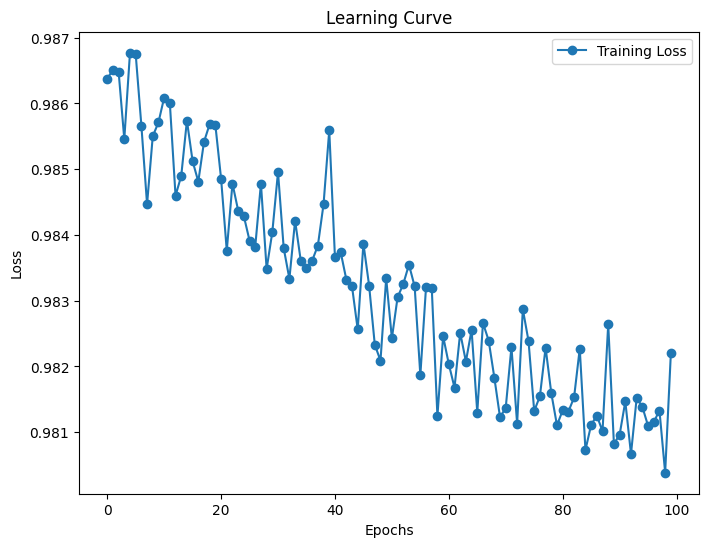

In [ ]:
# Plotten van het verloop van de training loss.
plt.figure(figsize=(8,6))
plt.plot(losses, marker='o', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Let op: bij de eerste keer plotten is het model opnieuw getraind,
# daarom zie je opnieuw alle 100 epochs hieronder.
# Bij een volledige run gebeurt dit niet.

Door naar de bovenstaande plot te kijken, kunnen we het leerproces van het model evalueren.

We zien hoe de training loss zich ontwikkelt over 100 epochs. Hoewel er kleine schommelingen zijn, is er een duidelijke dalende trend zichtbaar. Dit betekent dat het model in staat is om te leren en zijn voorspellingen tijdens training te verbeteren.

Wat wel opvalt, is dat de loss-waarden relatief hoog blijven. De laagste waarde ligt rond de 0.98, wat vrij ver afligt van de ideale loss voor een goed diffusion model (meestal < 0.1). Mogelijke oorzaken hiervan zijn:
<br><br>

- Kleine dataset: We gebruikten ongeveer 4.000 afbeeldingen. In de praktijk worden diffusion modellen vaak getraind op datasets van tientallen miljoenen tot zelfs miljarden afbeeldingen. Bijvoorbeeld:

  - Stable Diffusion is getraind op LAION-5B, een dataset met meer dan 5 miljard afbeeldings-tekst-paren.
  (LAION-5B: A NEW ERA OF OPEN LARGE-SCALE MULTI-MODAL DATASETS | LAION, z.d.)

  - Imagen (Google) maakt gebruik van een hoogwaardige dataset met miljoenen gelabelde beelden om fotorealistische afbeeldingen te genereren op basis van tekst.
  (Saharia et al., 2022)

  Deze modellen laten zien dat voor goede prestaties vaak enorme hoeveelheden trainingsdata nodig zijn.<br><br>



- Lage resolutie: We gebruikten afbeeldingen van 32×32 pixels, wat erg klein is. Hierdoor verliest het model veel visuele details die belangrijk zijn voor het leren van stijl of structuur. Hogere resoluties (>128×128) geven vaak betere resultaten, maar vragen veel meer rekenkracht waar wij gedurende het portfolio geen beschikking over hadden.

- Beperkte modelcapaciteit: Omdat we het model op een CPU moesten draaien, hebben we gekozen voor een relatief klein model met drie verborgen lagen. Complexere modellen (met meer lagen en parameters) leren vaak beter, maar zijn te zwaar voor onze huidige setup.

Wel zien wij een daling in de loss, wat aangeeft dat het model aan het leren is. Dit is een positieve observatie wat ons hoop geeft dat wij goed op weg zijn met het model.

[Back to the top](#start)
<a name='4.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H4: Vergelijken werkelijke data met gegenereerde data</strong></h2>
</div>

Na het trainen van het model is het tijd om te kijken naar de prestaties. We doen dit door een visuele vergelijking te maken tussen afbeeldingen uit de oorspronkelijke Baroque-dataset en afbeeldingen die door het model zijn gegenereerd.

- Met de functie sample() genereren we nieuwe afbeeldingen op basis van puur ruis, en met compare_generated_vs_real() zetten we deze naast een selectie van echte afbeeldingen.

- Op deze manier krijgen we een eerste indruk van hoe goed het model erin slaagt om de stijl en kenmerken van de trainingsdata na te bootsen. Het doel is niet om exacte kopieën te maken, maar om nieuwe afbeeldingen te creëren die qua stijl en opbouw overeenkomen met de originele Baroque kunst, echter is dit helaas in ons geval niet gelukt.

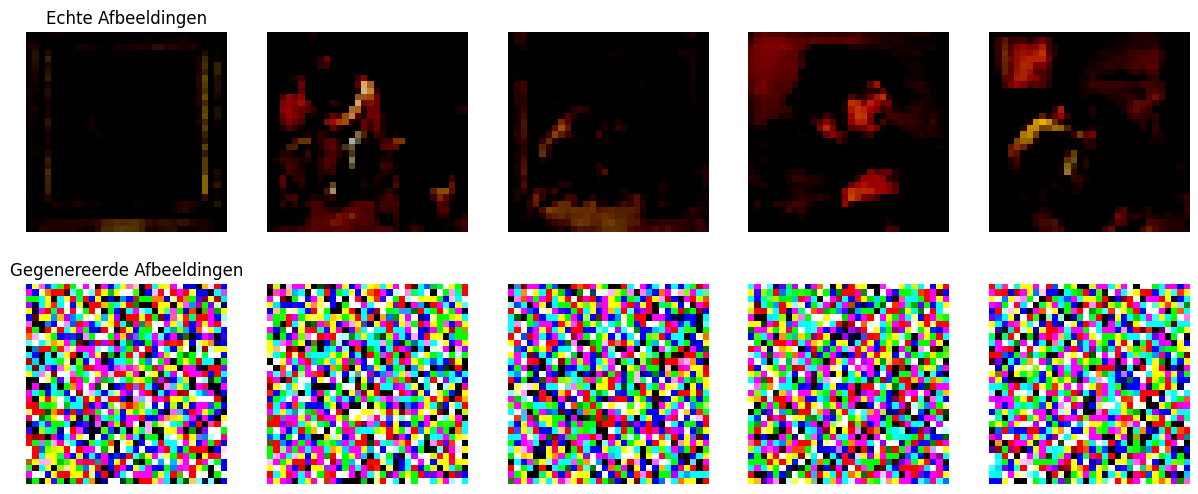

In [ ]:
generated_samples = sample(model, shape=(5, 32, 32, 3))
compare_generated_vs_real(generated_samples, dataset_32[:5])

[Back to the top](#start)
<a name='5.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H5: Korte reflectie op resultaten</strong></h2>
</div>

<a name='5.1'></a>
<h3>&sect;5.1: Onze resultaten</h3>

Helaas is het ons (nog) niet gelukt om een afbeelding te genereren die visueel overeenkomt met de werkelijke data. In plaats daarvan genereert het model voornamelijk ruis. Mogelijke oorzaken hiervan zijn het beperkte aantal trainingsafbeeldingen, een te eenvoudig model (bijvoorbeeld te weinig lagen), of een tekort aan trainingsrondes (epochs).

Binnen de beschikbare tijd hebben we veel aanpassingen moeten doen aan de modelcode. Zo hebben we meer lagen toegevoegd, een andere activatiefunctie toegepast, het aantal epochs verhoogd en gespeeld met de grootte van de afbeeldingenn. Een grote uitdaging was het gebrek aan een computer met GPU. Hierdoor werd het trainen van het model erg tijdrovend, één epoch duurde soms wel drie uur, wat het lastig maakte om uitgebreid te experimenteren met verbeteringen.

Wel zijn we erin geslaagd om een trainingsronde te draaien waarbij de loss bleef dalen, maar uiteindelijk stabiliseerde rond een waarde van 0.86. Voor een goed werkend diffusion model zou de loss idealiter tussen de 0.1 en 0.01 moeten liggen. Dit niveau hebben we binnen onze testopstelling helaas niet weten te bereiken.

<a name='5.2'></a>
<h3>&sect;5.2: Resultaten andere gebruiker</h3>

Na het trainen en evalueren van het model zijn wij er achter gekomen dat het nog niet werkt hoe wij het zouden willen. Wij zijn online gaan zoeken naar andere mensen die ook Diffusion Modellen from scratch maakt en kwam een post tegen op Reddit. (Full-Bell-4323, 2024) In deze post praat de gebruiker over het interesse in het bouwen van een generatief model "from scratch" en geeft hierbij ook een link naar zijn/haar GitHub. Hier staa een repository, K3dA (2024 september), met de code voor het model die gebouwd is door de gebruiker. Wanneer wij naar de resultaten kijken zien wij precies dezelfde resultaten, afbeeldingen  van ruis. Wij zien hierdoor ook dat wij niet de enige zijn die tegen het zelfde probleem aanlopen.

[Back to the top](#start)
<a name='6.0'></a>

<div style="background-color:#216375; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H6: Literatuurlijst</strong></h2>
</div>

- [Ho, J., Jain, A., & Abbeel, P. (2020, 19 juni). Denoising diffusion probabilistic models. arXiv.org.]( https://arxiv.org/abs/2006.11239)
- [_Generative AI: What, why, how, when | UpTech_. (2024, 15 november).](https://www.uptech.team/blog/how-to-build-generative-ai)
- [AssemblyAI. (2022, 17 juni). _Diffusion models explained in 4-difficulty levels_. YouTube](https://www.youtube.com/watch?v=yTAMrHVG1ew)
- [_ChatGPT - Verbetering diffusionmodel prestaties_. (2025). ChatGPT.](https://chatgpt.com/share/67e28652-1874-8000-96be-5b45027fc2b2)
- [WikiArt. (2022, 14 september). Kaggle.]( https://www.kaggle.com/datasets/steubk/wikiart?select=Baroque)
- [Patel, M. (2023, 23 oktober). The Complete Guide to Image Preprocessing Techniques in Python. _Medium_.](https://medium.com/@maahip1304/the-complete-guide-to-image-preprocessing-techniques-in-python-dca30804550c)
- [Tensorflow. (2024, april). *Module: tf*.](https://www.tensorflow.org/api_docs/python/tf)
- [Tensorflow. (2024, april). *tf.GradientTape*.](https://www.tensorflow.org/api_docs/python/tf/GradientTape)
- [Tensorflow. (2024, april). *tf.Variable*.](https://www.tensorflow.org/api_docs/python/tf/Variable)
- [Da Costa-Luis, C. (2022). _tqdm documentation_.](https://tqdm.github.io/)
- [LAION-5B: A NEW ERA OF OPEN LARGE-SCALE MULTI-MODAL DATASETS | LAION. (z.d.).]( https://laion.ai/blog/laion-5b/)
- [Saharia, C., Chan, W., Saxena, S., Li, L., Whang, J., Denton, E., Ghasemipour, S. K. S., Ayan, B. K., Mahdavi, S. S., Lopes, R. G., Salimans, T., Ho, J., Fleet, D. J., & Norouzi, M. (2022, 23 mei). Photorealistic Text-to-Image Diffusion Models with Deep Language Understanding. arXiv.org. ](https://arxiv.org/abs/2205.11487)
- [Full-Bell-4323 (2024, augustus). *Building Gen Ai models from scratch*.](https://www.reddit.com/r/learnmachinelearning/comments/1eu1oj3/building_gen_ai_models_from_scratch_sharing_my/)
- [K3dA. (2024, september). _Conditional-Diffusion-model/cifar_diffusion.ipynb at main · K3dA2/Conditional-Diffusion-model_. GitHub.](https://github.com/K3dA2/Conditional-Diffusion-model/blob/main/cifar_diffusion.ipynb)